<a href="https://colab.research.google.com/github/tiffchu/spotify-sandbox/blob/main/spotify_apr14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spotipy
!pip install python-dotenv

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
client_id = "7502c71b4d294aa58286f5e3a2c6dd74"
client_secret = "72177ee7e0cf481895fe5146619dfe45"
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [ ]:
from dotenv import load_dotenv
import os
import base64
from requests import post
import json
import numpy as np

def get_token():
  auth_string = client_id + ":" + client_secret
  auth_bytes = auth_string.encode("utf-8")
  auth_base64 = str(base64.b64encode(auth_bytes), "utf-8")
  url = 'https://accounts.spotify.com/api/token'
  headers = {
      "authorization" : "Basic " + auth_base64,
      "content_type": "application/x-www-urlencoded"
  }
  data = {"grant_type": "client_credentials"}
  result = post(url, headers=headers, data=data)
  json_result = json.loads(result.content)
  token = json_result["access_token"]
  return token

token = get_token()
print(token)

BQBa7pU7bFZwP2npWJRcQesFeC7yXiBO5ezCdDbDeQVkDjr0OK7vpd8BPyaMqLleeUjG82OoWIsxsFlduhAnT9DVXpGY53K52qH0bng88bnWyu6Ye8U


In [ ]:
import requests

token_url = 'https://accounts.spotify.com/api/token'

#payload for the POST request
payload = {
    'grant_type': 'client_credentials',
    'client_id': client_id,
    'client_secret': client_secret
}

# Make the POST request to obtain the access token
response = requests.post(token_url, data=payload)

# Parse the JSON response
response_data = response.json()

# Extract the access token from the response
access_token = response_data['access_token']

# Print the access token
print("Access Token:", access_token)


Access Token: BQB57hy6qQhcfr26QWyMJ6zrQ0F807jiZLK5FFhOo1ynghlKpUwgq0DI9aKMvesFFy2aujPvAfSWk7LS4hE3xB_K0fUskCHSTmWrcUcmHRzVuBtNp5A


In [ ]:
name = ["sleepy fish"]
result = sp.search(name)
result['tracks']['items'][1]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/1IJe80moz409PtxW4llPFw'},
  'href': 'https://api.spotify.com/v1/artists/1IJe80moz409PtxW4llPFw',
  'id': '1IJe80moz409PtxW4llPFw',
  'name': 'Sleepy Fish',
  'type': 'artist',
  'uri': 'spotify:artist:1IJe80moz409PtxW4llPFw'}]

In [ ]:
porter = sp.search(q='artist:Future', limit=50)
for track in porter['tracks']['items']:
    print(track['name'], '-', track['artists'][0]['name'])

Like That - Future
Type Shit - Future
Cinderella - Future
We Don't Trust You - Future
Young Metro - Future
We Still Don't Trust You - Future
Solo - Future
Ice Attack - Future
WAIT FOR U (feat. Drake & Tems) - Future
PUFFIN ON ZOOTIEZ - Future
Everyday Hustle - Future
Slimed In - Future
Low Life (feat. The Weeknd) - Future
Red Leather - Future
Fried (She a Vibe) - Future
Out Of My Hands - Future
Mask Off - Future
Magic Don Juan (Princess Diana) - Future
Show of Hands - Future
Claustrophobic - Future
Runnin Outta Time - Future
All My Life - Future
Drink N Dance - Future
GTA - Future
Ain't No Love - Future
Jealous - Future
All to Myself - Future
The Percocet & Stripper Joint - Future
Nights Like This - Future
WTFYM - Future
Streets Made Me A King - Future
Luv Bad Bitches - Future
Seen it All - Future
This Sunday - Future
Where My Twin @ - Bonus - Future
Crossed Out - Future
Nobody Knows My Struggle - Future
Crazy Clientele - Future
Beat It - Future
Amazing (Interlude) - Future
LOVE YOU BE

In [ ]:
results = sp.search(q='artist:Future', limit=50)

for track in results['tracks']['items']:
    print(track['name'], '-', track['artists'][0]['name'])
    track_id = track['id']

    # audio features only if track_id is not None
    if track_id:
        audio_features = sp.audio_features([track_id])
        if audio_features is not None and audio_features[0] is not None:
            print("Audio Features:")
            for feature, value in audio_features[0].items():
                print(f"{feature}: {value}")
        else:
            print("Audio features not available for this track.")
    else:
        print("Track ID is None.")


Like That - Future


ERROR:spotipy.client:Max Retries reached


SpotifyException: http status: 429, code:-1 - /v1/audio-features/?ids=2tudvzsrR56uom6smgOcSf:
 Max Retries, reason: too many 429 error responses

In [ ]:
import pandas as pd

artist_name = 'Future'

# Perform a search for the artist
results = sp.search(q='artist:' + artist_name, type='artist')

# Get the artist ID
artist_id = results['artists']['items'][0]['id']

# Initialize lists to store track information and audio features
tracks_info = []
audio_features_list = []

# Fetch the artist's top tracks
top_tracks = sp.artist_top_tracks(artist_id)

# Iterate over the top tracks
for track in top_tracks['tracks']:
    # Get track information
    track_info = {
        'Track Name': track['name'],
        'Artist Name': artist_name,
        'Track ID': track['id']
    }
    tracks_info.append(track_info)

    # Get audio features for the track
    audio_features = sp.audio_features([track['id']])
    if audio_features and audio_features[0]:
        audio_features_list.append(audio_features[0])
    else:
        # If audio features are not available, append None
        audio_features_list.append(None)

# Create DataFrames from the lists of track information and audio features
tracks_df = pd.DataFrame(tracks_info)
audio_features_df = pd.DataFrame(audio_features_list)

# Merge the two DataFrames on the index (outer join to include all tracks)
pd.concat([tracks_df, audio_features_df], axis=1)


ERROR:spotipy.client:Max Retries reached


SpotifyException: http status: 429, code:-1 - /v1/audio-features/?ids=2tudvzsrR56uom6smgOcSf:
 Max Retries, reason: too many 429 error responses

In [ ]:
# REFER TO THIS

artist_name = 'Issy Wood'

# Search for the artist
results = sp.search(q='artist:' + artist_name, type='artist')

# Get the artist ID
artist_id = results['artists']['items'][0]['id']

# Get albums from the artist
albums = sp.artist_albums(artist_id, album_type='album', limit=50)

# Create a list to store track information and audio features
tracks_info = []
audio_features_list = []

# Iterate over each album
for album in albums['items']:
    # Get the album ID
    album_id = album['id']

    # Get tracks from the album
    tracks = sp.album_tracks(album_id)

    # Iterate over each track
    for track in tracks['items']:
        # Get track information
        track_info = {
            'Track Name': track['name'],
            'Album Name': album['name'],
            'Release Date': album['release_date'],
        }
        tracks_info.append(track_info)

        # Get audio features for the track
        audio_features = sp.audio_features([track['id']])[0]
        audio_features_list.append(audio_features)

# Create DataFrames from the lists of track information and audio features
tracks_df = pd.DataFrame(tracks_info)
audio_features_df = pd.DataFrame(audio_features_list)

# Merge the two DataFrames on index
pd.concat([tracks_df, audio_features_df], axis=1)

ERROR:spotipy.client:Max Retries reached


SpotifyException: http status: 429, code:-1 - /v1/audio-features/?ids=6xctk1HS4sVso6wP8BgdeK:
 Max Retries, reason: too many 429 error responses

In [ ]:
#works but error reason: too many 429 error responses

import time

start_time = time.time()
artist_names = ['Drake', 'J Cole', 'Travis Scott', 'Megan Thee Stallion', 'Doja Cat',
                'Kid Cudi', 'Nicki Minaj', '21 Savage', 'Metro Boomin', 'Gunna',
                'Kendrick Lamar', 'Jack Harlow', 'Eminem', 'Tupac', 'Biggie', 'NWA']

all_tracks_info = []
all_audio_features = []

# Loop through each artist
for artist_name in artist_names:
    # Search for the artist
    results = sp.search(q='artist:' + artist_name, type='artist')
    artist_id = results['artists']['items'][0]['id']

    # Get albums from the artist
    albums = sp.artist_albums(artist_id, album_type='album', limit=50)

    # Iterate over each album
    for album in albums['items']:
        # Get the album ID
        album_id = album['id']

        # Get tracks from the album
        tracks = sp.album_tracks(album_id)

        # Iterate over each track
        for track in tracks['items']:
            # Get track information
            track_info = {
                'Artist Name': artist_name,
                'Track Name': track['name'],
                'Album Name': album['name'],
                'Release Date': album['release_date'],
            }
            all_tracks_info.append(track_info)

            # Get audio features for the track
            audio_features = sp.audio_features([track['id']])[0]
            all_audio_features.append(audio_features)

# Create DataFrames from the lists of track information and audio features
tracks_df = pd.DataFrame(all_tracks_info)
audio_features_df = pd.DataFrame(all_audio_features)

# Merge the two DataFrames on index
pd.concat([tracks_df, audio_features_df], axis=1)

end_time = time.time()

# Calculate runtime
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

ERROR:spotipy.client:Max Retries reached


SpotifyException: http status: 429, code:-1 - /v1/audio-features/?ids=7IqsNN0EMckx9YqddgXlwg:
 Max Retries, reason: too many 429 error responses

In [ ]:
#function - audio features from album url
def extract_album_id(album_url):
    album_id = album_url.split('/')[-1].split('?')[0]
    return album_id

def get_audio_features(track_id):
    audio_features = sp.audio_features([track_id])[0]
    return audio_features

def get_album(album_url):
    album_id = extract_album_id(album_url)
    album_info = sp.album(album_id)
    return album_info

#baseball sound effects album
album_url = 'https://open.spotify.com/album/3buFPZgdX6l89c1qycFlJN?si=tqhJy9jCQSGDPsA02vtZFQ'
album_info = get_album(album_url)

#initalize empty df
track_names = []
audio_features_list = []

for track in album_info['tracks']['items']:
    track_name = track['name']
    track_id = track['id']
    print("\nTrack Name:", track_name)

    audio_features = get_audio_features(track_id)
    print("Audio Features:", audio_features)

    #APPEND TO DF
    track_names.append(track_name)
    audio_features_list.append(audio_features)

pd.DataFrame(audio_features_list, index=track_names)
#download below csv
   df = pd.DataFrame(audio_features_list, index=track_names)
   df.to_csv('album_audio_features.csv', index=True)

In [ ]:
# Function to extract playlist ID from Spotify playlist URL
def extract_playlist_id(playlist_url):
    playlist_id = playlist_url.split('/')[-1].split('?')[0]
    return playlist_id

# Function to get audio features for a track
def get_audio_features(track_id):
    audio_features = sp.audio_features([track_id])[0]
    return audio_features

# Function to get playlist information
def get_playlist(playlist_url):
    playlist_id = extract_playlist_id(playlist_url)
    playlist_info = sp.playlist(playlist_id)
    return playlist_info

#inputs
playlist_url = 'https://open.spotify.com/playlist/37i9dQZEVXbLRQDuF5jeBp?si=0d45b0b6067e404d' #top 50 USA
playlist_info = get_playlist(playlist_url)
print("Playlist Name:", playlist_info['name'])
print("Playlist Owner:", playlist_info['owner']['display_name'])
print("Number of Tracks:", playlist_info['tracks']['total'])

# Iterate over tracks in the playlist and get audio features for each track
num_tracks_to_process = 10  # Set the limit here
for index, item in enumerate(playlist_info['tracks']['items']):
    if index >= num_tracks_to_process:
        break

    track = item['track']
    print("Track Name:", track['name'])
    print("Artist(s):", ", ".join([artist['name'] for artist in track['artists']]))

    # Get audio features for the track
    audio_features = get_audio_features(track['id'])
    print("Audio Features:", audio_features)

In [ ]:
import time

# Function to get audio features for a track with a delay
def get_audio_features_with_delay(track_id):
    time.sleep(1)  # Add a delay of 1 second between requests
    audio_features = sp.audio_features([track_id])[0]
    return audio_features

# Iterate over tracks in the playlist and get audio features for each track
num_tracks_to_process = 10  # Set the limit here
for index, item in enumerate(playlist_info['tracks']['items']):
    if index >= num_tracks_to_process:
        break

    track = item['track']
    print("Track Name:", track['name'])
    print("Artist(s):", ", ".join([artist['name'] for artist in track['artists']]))

    # Get audio features for the track with a delay
    audio_features = get_audio_features_with_delay(track['id'])
    print("Audio Features:", audio_features)


In [ ]:
#works but error reason: too many 429 error responses

import time

start_time = time.time()
artist_names = ['Drake', 'J Cole', 'Travis Scott']

all_tracks_info = []
all_audio_features = []

# Loop through each artist
for artist_name in artist_names:
    # Search for the artist
    results = sp.search(q='artist:' + artist_name, type='artist')
    artist_id = results['artists']['items'][0]['id']

    # Get albums from the artist
    albums = sp.artist_albums(artist_id, album_type='album', limit=50)

    # Iterate over each album
    for album in albums['items']:
        # Get the album ID
        album_id = album['id']

        # Get tracks from the album
        tracks = sp.album_tracks(album_id)

        # Iterate over each track
        for track in tracks['items']:
            # Get track information
            track_info = {
                'Artist Name': artist_name,
                'Track Name': track['name'],
                'Album Name': album['name'],
                'Release Date': album['release_date'],
            }
            all_tracks_info.append(track_info)

            # Get audio features for the track
            audio_features = sp.audio_features([track['id']])[0]
            all_audio_features.append(audio_features)

# Create DataFrames from the lists of track information and audio features
tracks_df = pd.DataFrame(all_tracks_info)
audio_features_df = pd.DataFrame(all_audio_features)

# Merge the two DataFrames on index
pd.concat([tracks_df, audio_features_df], axis=1)

end_time = time.time()

# Calculate runtime
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

ERROR:spotipy.client:Max Retries reached


SpotifyException: http status: 429, code:-1 - /v1/audio-features/?ids=6YV2AI87l1n2fzqU8Dyo05:
 Max Retries, reason: too many 429 error responses

In [ ]:

import time

# Define a list of artist names
artist_names = ['Drake', 'J Cole', 'Travis Scott', 'Megan Thee Stallion', 'Doja Cat',
                'Kid Cudi', 'Nicki Minaj', '21 Savage', 'Metro Boomin', 'Gunna',
                'Kendrick Lamar', 'Jack Harlow', 'Eminem', 'Tupac', 'Biggie', 'NWA']

# Create empty lists to store track information and audio features
all_tracks_info = []
all_audio_features = []

# Loop through each artist
for artist_name in artist_names:
    retry_count = 0

    while True:
        try:
            # Search for the artist
            results = sp.search(q='artist:' + artist_name, type='artist')
            artist_id = results['artists']['items'][0]['id']

            # Get albums from the artist
            albums = sp.artist_albums(artist_id, album_type='album', limit=50)

            # Iterate over each album
            for album in albums['items']:
                # Get the album ID
                album_id = album['id']

                # Get tracks from the album
                tracks = sp.album_tracks(album_id)

                # Iterate over each track
                for track in tracks['items']:
                    # Get track information
                    track_info = {
                        'Artist Name': artist_name,
                        'Track Name': track['name'],
                        'Album Name': album['name'],
                        'Release Date': album['release_date'],
                    }
                    all_tracks_info.append(track_info)

                    # Get audio features for the track
                    audio_features = sp.audio_features([track['id']])[0]
                    all_audio_features.append(audio_features)

            # Break out of the retry loop if successful
            break

        except spotipy.SpotifyException as e:
            if e.http_status == 429:  # If rate limit exceeded
                if retry_count < 3:  # Retry up to 3 times
                    retry_count += 1
                    wait_time = 2 ** retry_count  # Exponential backoff
                    print(f"Rate limit exceeded. Retrying in {wait_time} seconds...")
                    time.sleep(wait_time)
                else:
                    print("Max retries reached. Exiting.")
                    break
            else:
                print("An error occurred:", e)
                break

# Create DataFrames from the lists of track information and audio features
tracks_df = pd.DataFrame(all_tracks_info)
audio_features_df = pd.DataFrame(all_audio_features)

# Merge the two DataFrames on index
pd.concat([tracks_df, audio_features_df], axis=1)


In [18]:
main_df = pd.read_csv("./data (1).csv")
main_df.head()

id                                           name  \
0  6KbQ3uYMLKb5jDxLF7wYDD                    Singende Bataillone 1. Teil   
1  6KuQTIu1KoTTkLXKrwlLPV       Fantasiestücke, Op. 111: Più tosto lento   
2  6L63VW0PibdM1HDSBoqnoM                 Chapter 1.18 - Zamek kaniowski   
3  6M94FkXd15sOAOQYRnWPN8  Bebamos Juntos - Instrumental (Remasterizado)   
4  6N6tiFZ9vLTSOIxkj8qKrd    Polonaise-Fantaisie in A-Flat Major, Op. 61   

                                    artists  duration_ms release_date  year  \
0                       ['Carl Woitschach']       158648         1928  1928   
1  ['Robert Schumann', 'Vladimir Horowitz']       282133         1928  1928   
2                   ['Seweryn Goszczyński']       104300         1928  1928   
3                      ['Francisco Canaro']       180760      9/25/28  1928   
4  ['Frédéric Chopin', 'Vladimir Horowitz']       687733         1928  1928   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0         0.995         0.708  0.1950             0.563    0.1510   -12.428   
1         0.994         0.379  0.0135             0.901    0.0763   -28.454   
2         0.604         0.749  0.2200             0.000    0.1190   -19.924   
3         0.995         0.781  0.1300             0.887    0.1110   -14.734   
4         0.990         0.210  0.2040             0.908    0.0980   -16.829   

   speechiness    tempo  valence  mode  key  popularity  explicit  
0       0.0506  118.469   0.7790     1   10           0         0  
1       0.0462   83.972   0.0767     1    8           0         0  
2       0.9290  107.177   0.8800     0    5           0         0  
3       0.0926  108.003   0.7200     0    1           0         0  
4       0.0424   62.149   0.0693     1   11           1         0

In [19]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                169909 non-null  object 
 1   name              169909 non-null  object 
 2   artists           169909 non-null  object 
 3   duration_ms       169909 non-null  int64  
 4   release_date      169909 non-null  object 
 5   year              169909 non-null  int64  
 6   acousticness      169909 non-null  float64
 7   danceability      169909 non-null  float64
 8   energy            169909 non-null  float64
 9   instrumentalness  169909 non-null  float64
 10  liveness          169909 non-null  float64
 11  loudness          169909 non-null  float64
 12  speechiness       169909 non-null  float64
 13  tempo             169909 non-null  float64
 14  valence           169909 non-null  float64
 15  mode              169909 non-null  int64  
 16  key               16

In [20]:

main_df.drop_duplicates(inplace=True)

<Axes: >

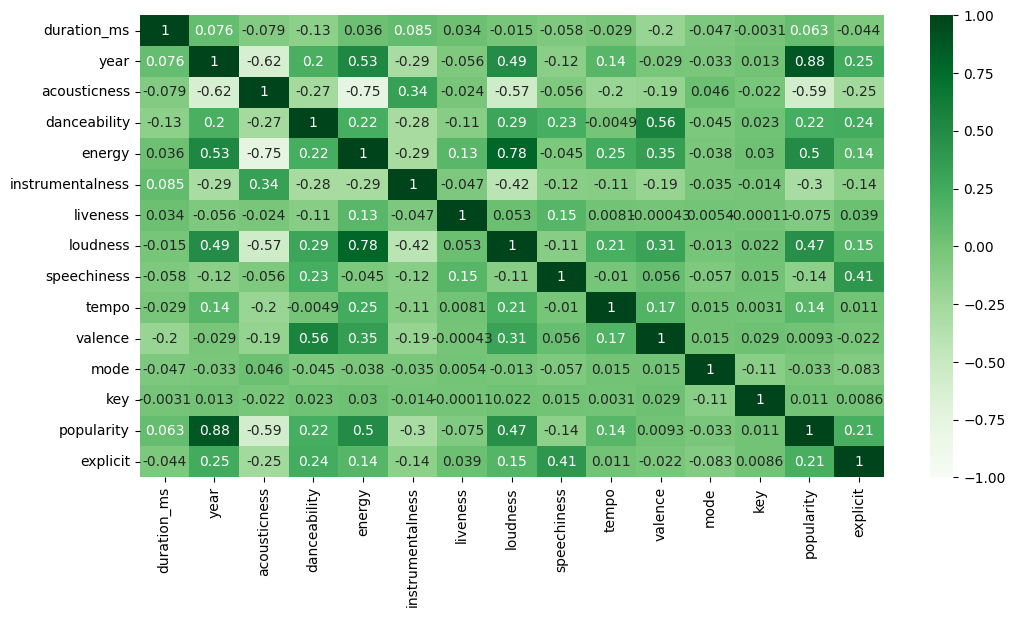

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

main_df_copy = main_df.copy()
main_df_copy = main_df_copy.drop(columns=['id', 'name', 'artists', 'release_date'])

plt.figure(figsize=(12, 6))
sns.heatmap(main_df_copy.corr(), vmin=-1, vmax=1, annot=True, cmap="Greens")

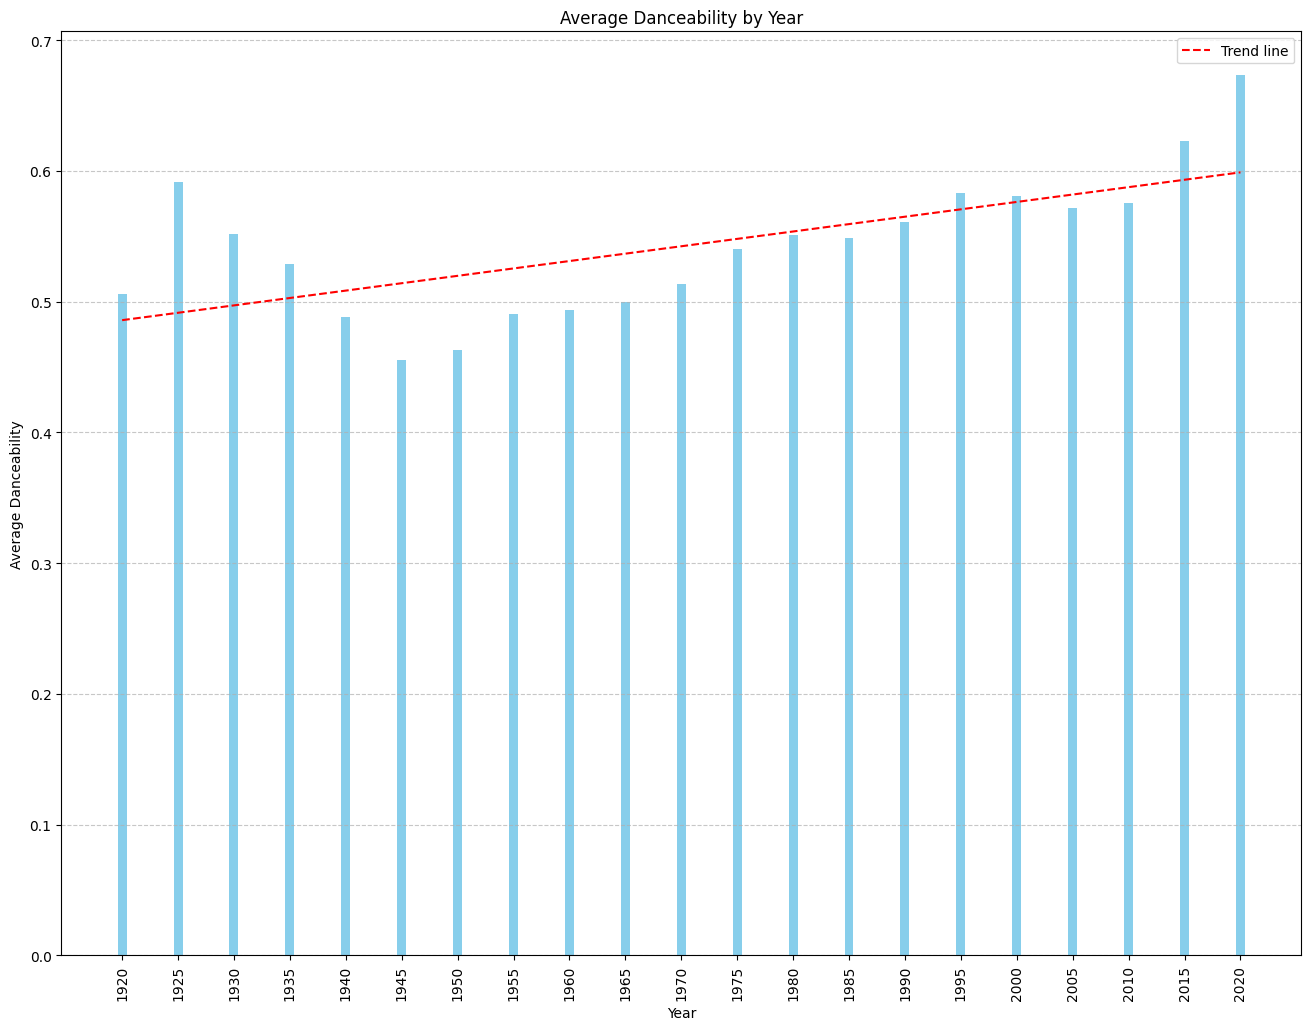

In [34]:

#the average 'danceability' per yr
average_danceability_by_year = main_df.groupby('year')['danceability'].mean().reset_index()
average_danceability_by_5_years = average_danceability_by_year.groupby(
    (average_danceability_by_year['year'] // 5) * 5
)['danceability'].mean().reset_index()


plt.figure(figsize=(16,12))
plt.bar(average_danceability_by_5_years['year'], average_danceability_by_5_years['danceability'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Average Danceability')
plt.title('Average Danceability by Year')
plt.xticks(average_danceability_by_5_years['year'], rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

x = average_danceability_by_5_years['year']
y = average_danceability_by_5_years['danceability']
coefficients = np.polyfit(x, y, 1)
trendline = np.poly1d(coefficients)
plt.plot(x, trendline(x), color='red', linestyle='--', label='Trend line')
plt.legend()

plt.show()


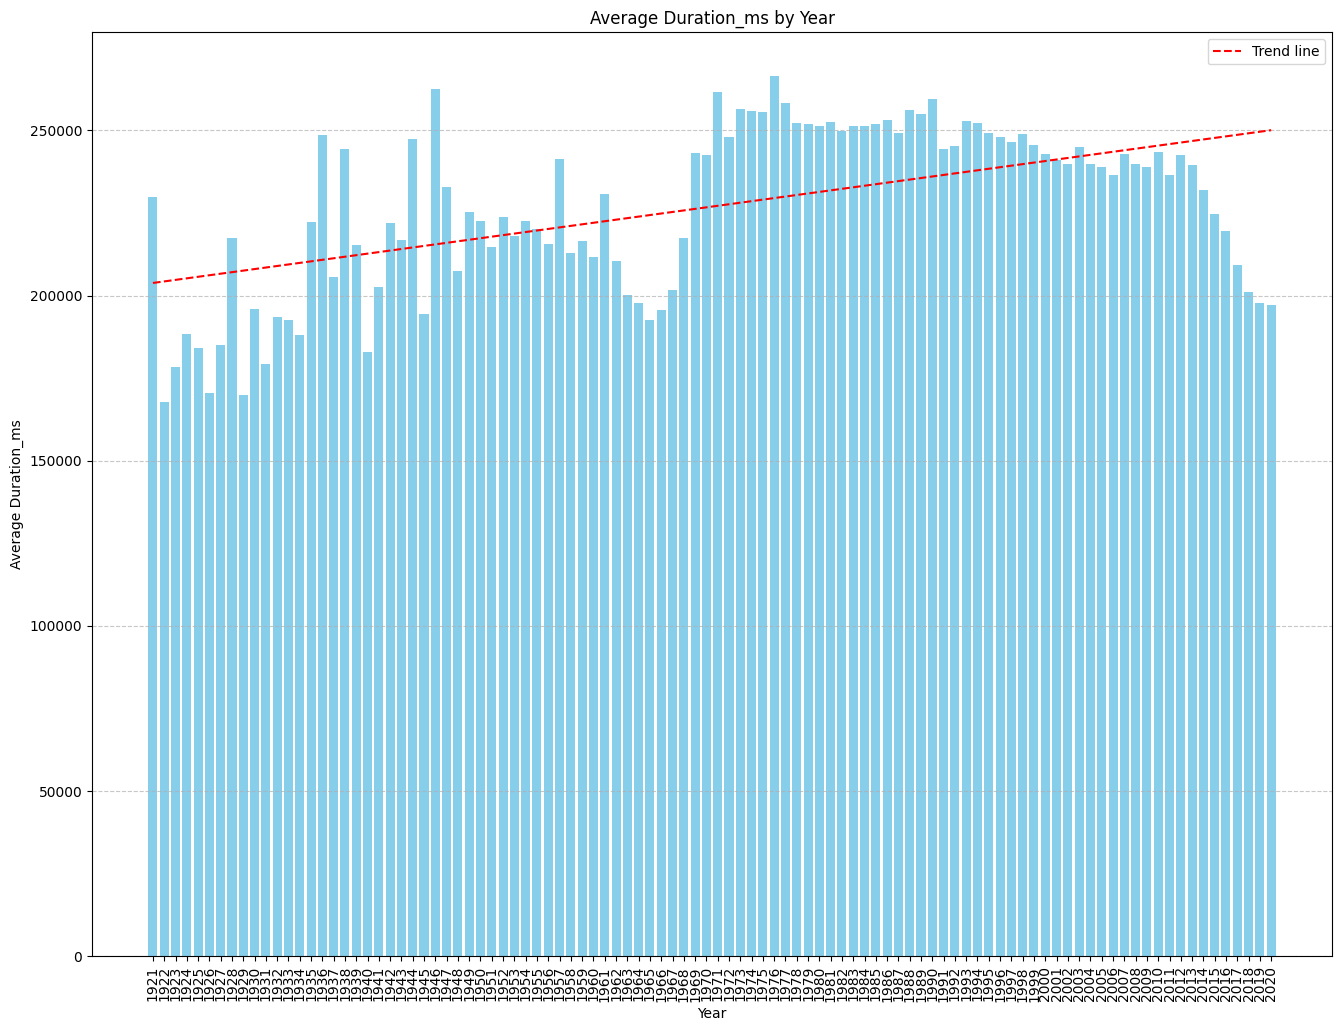

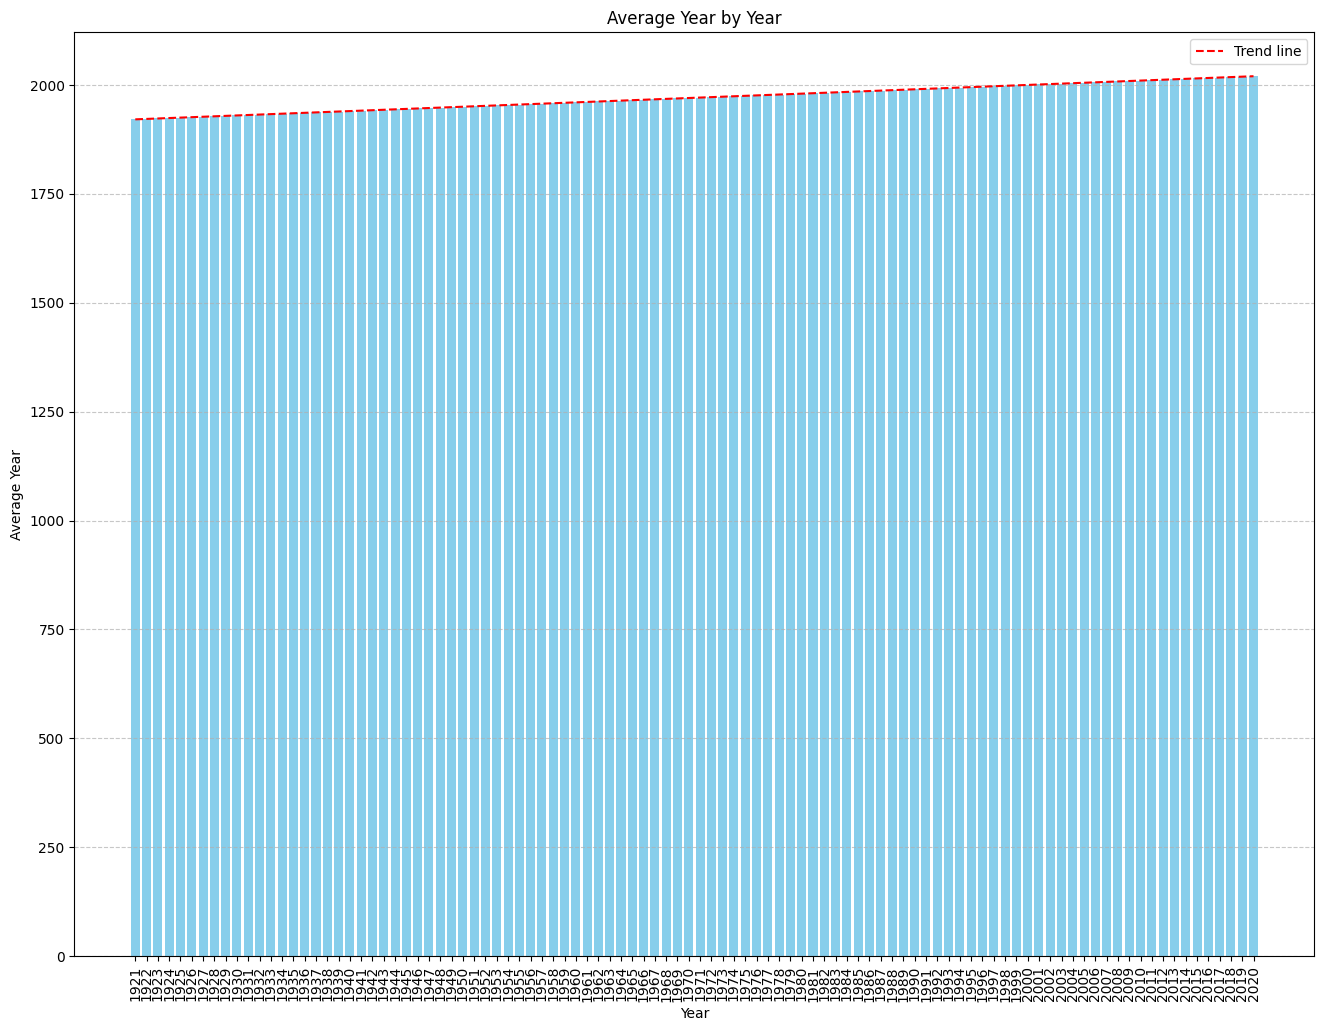

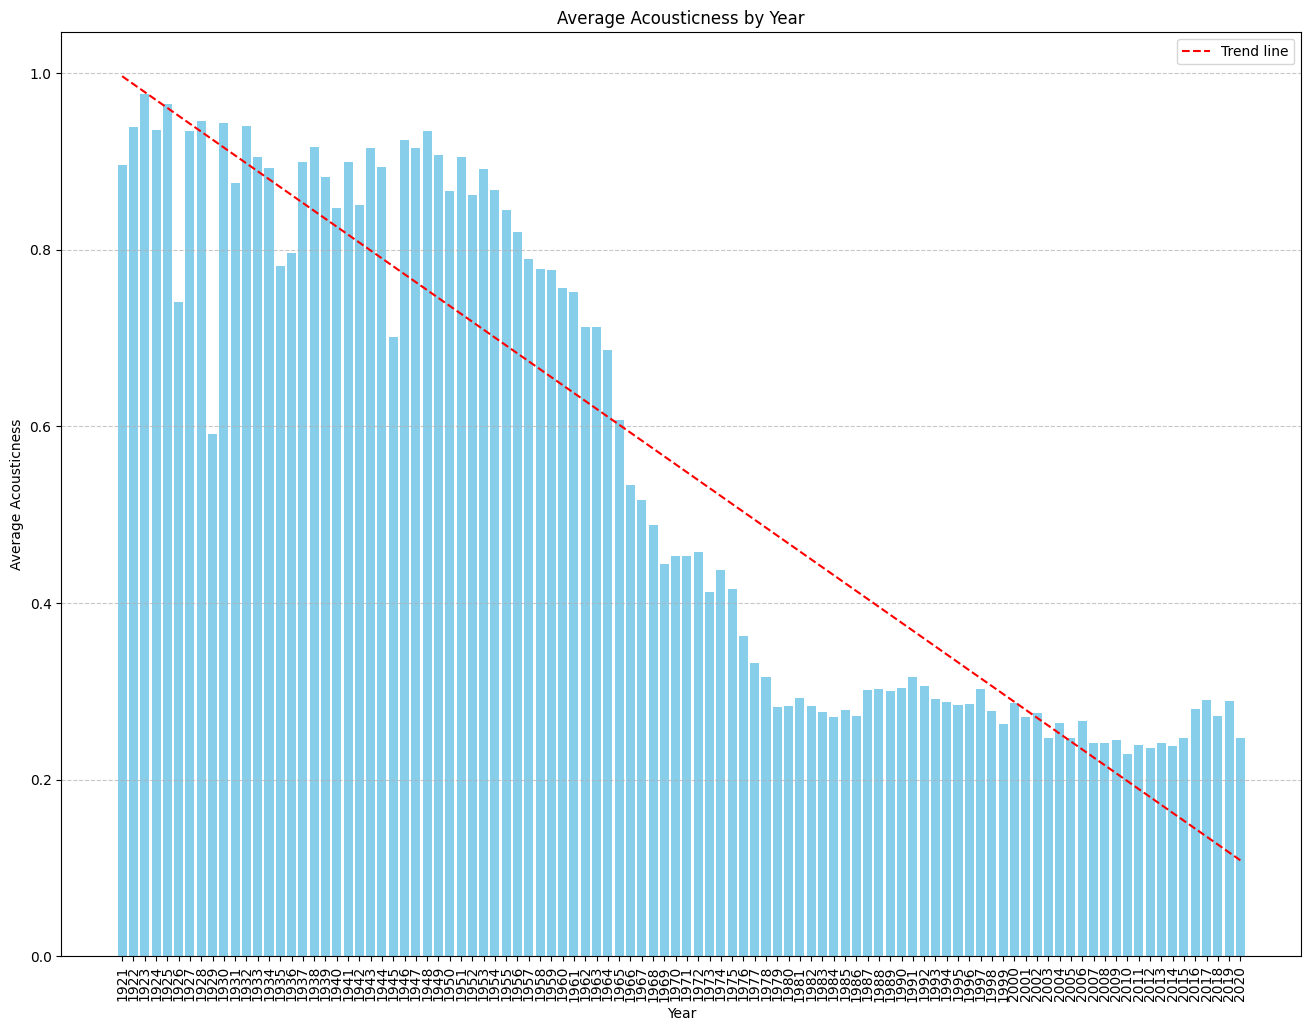

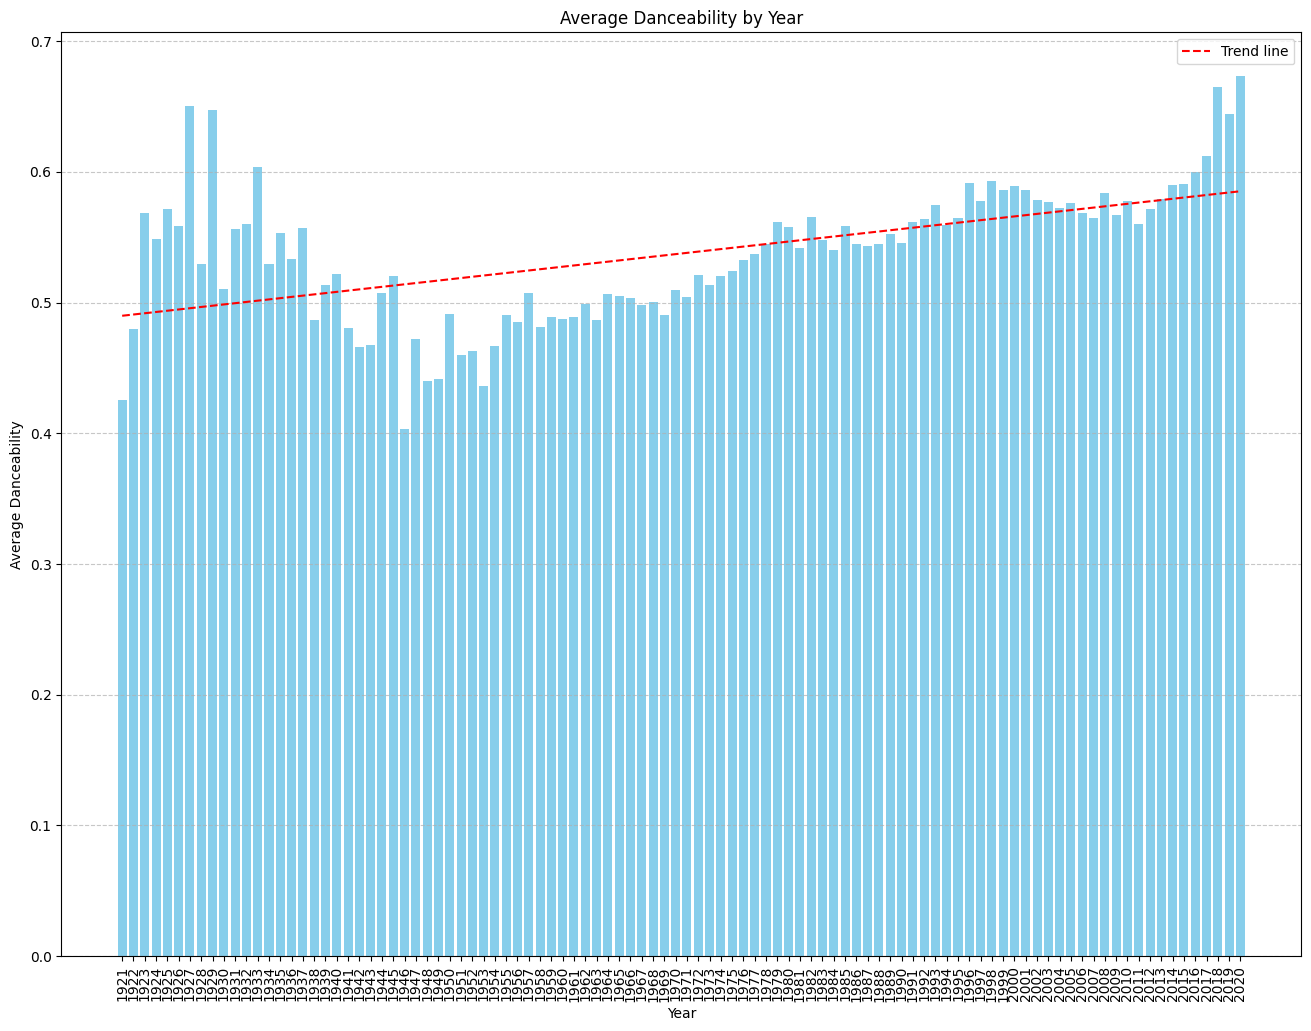

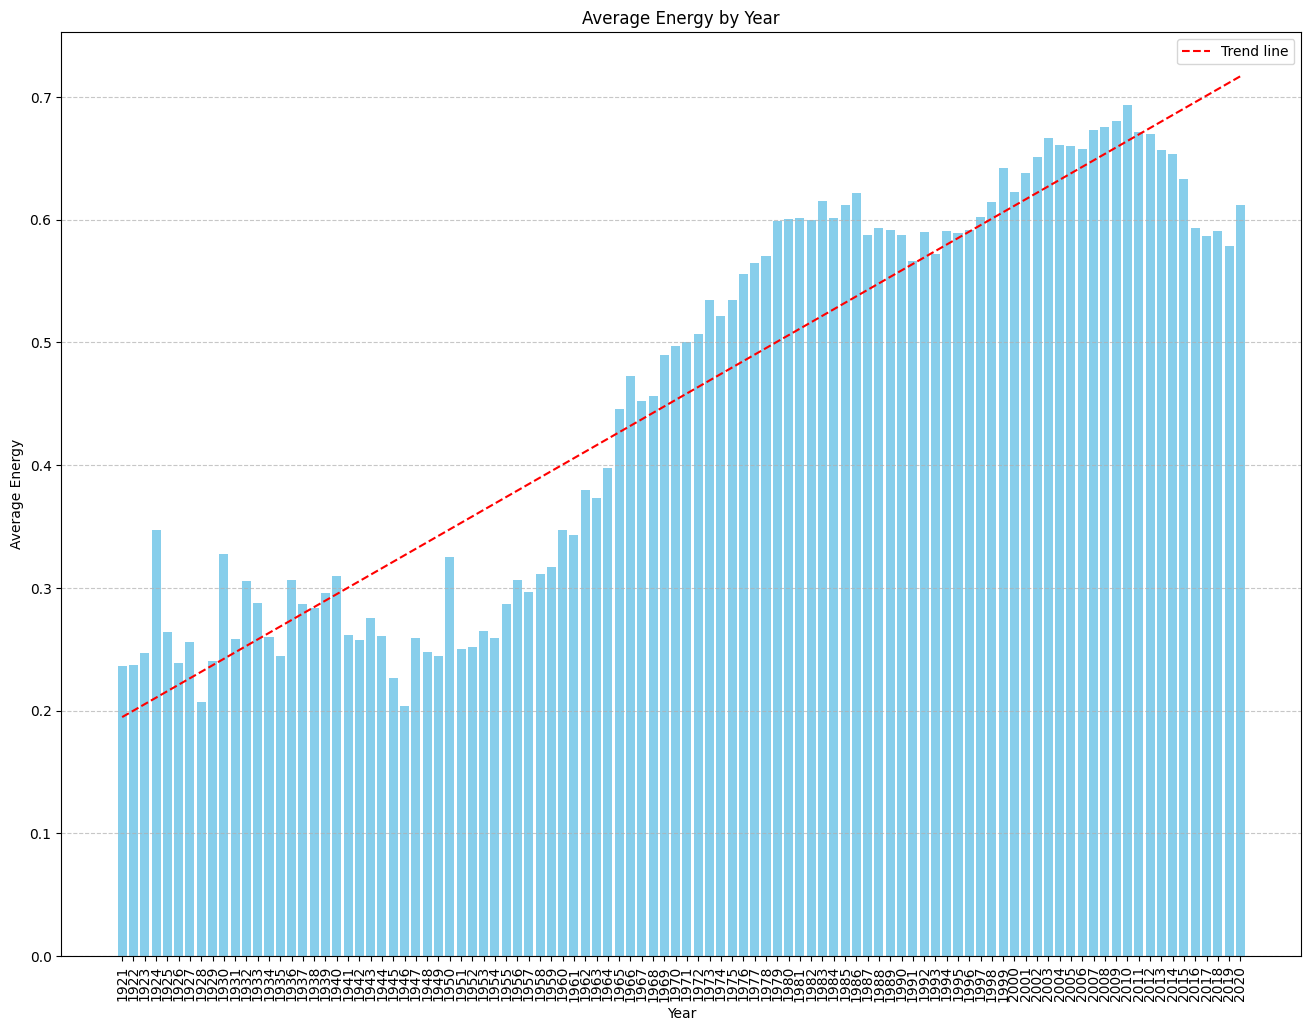

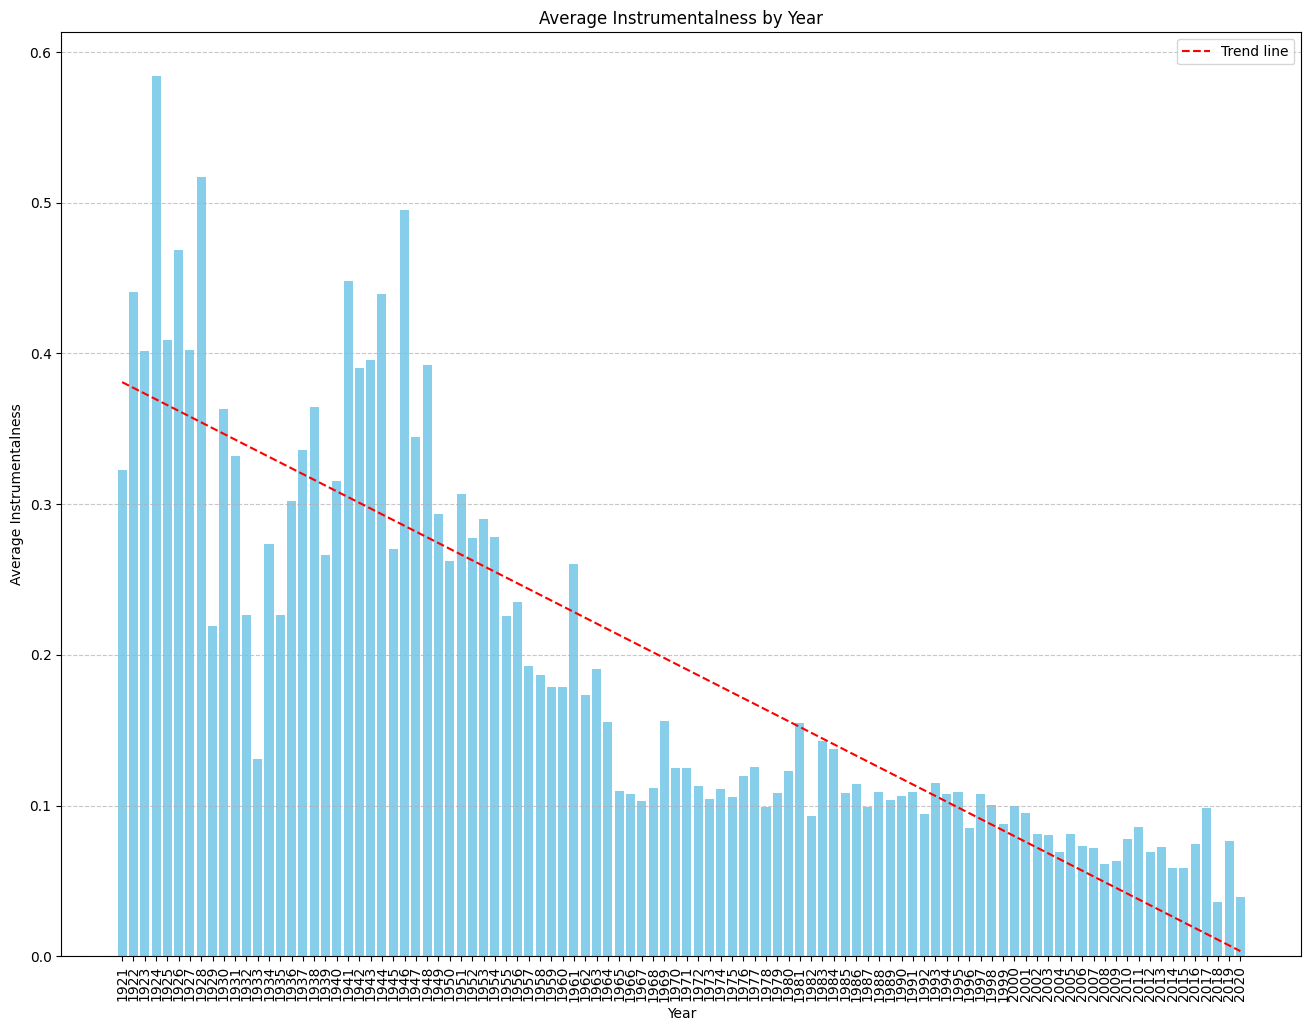

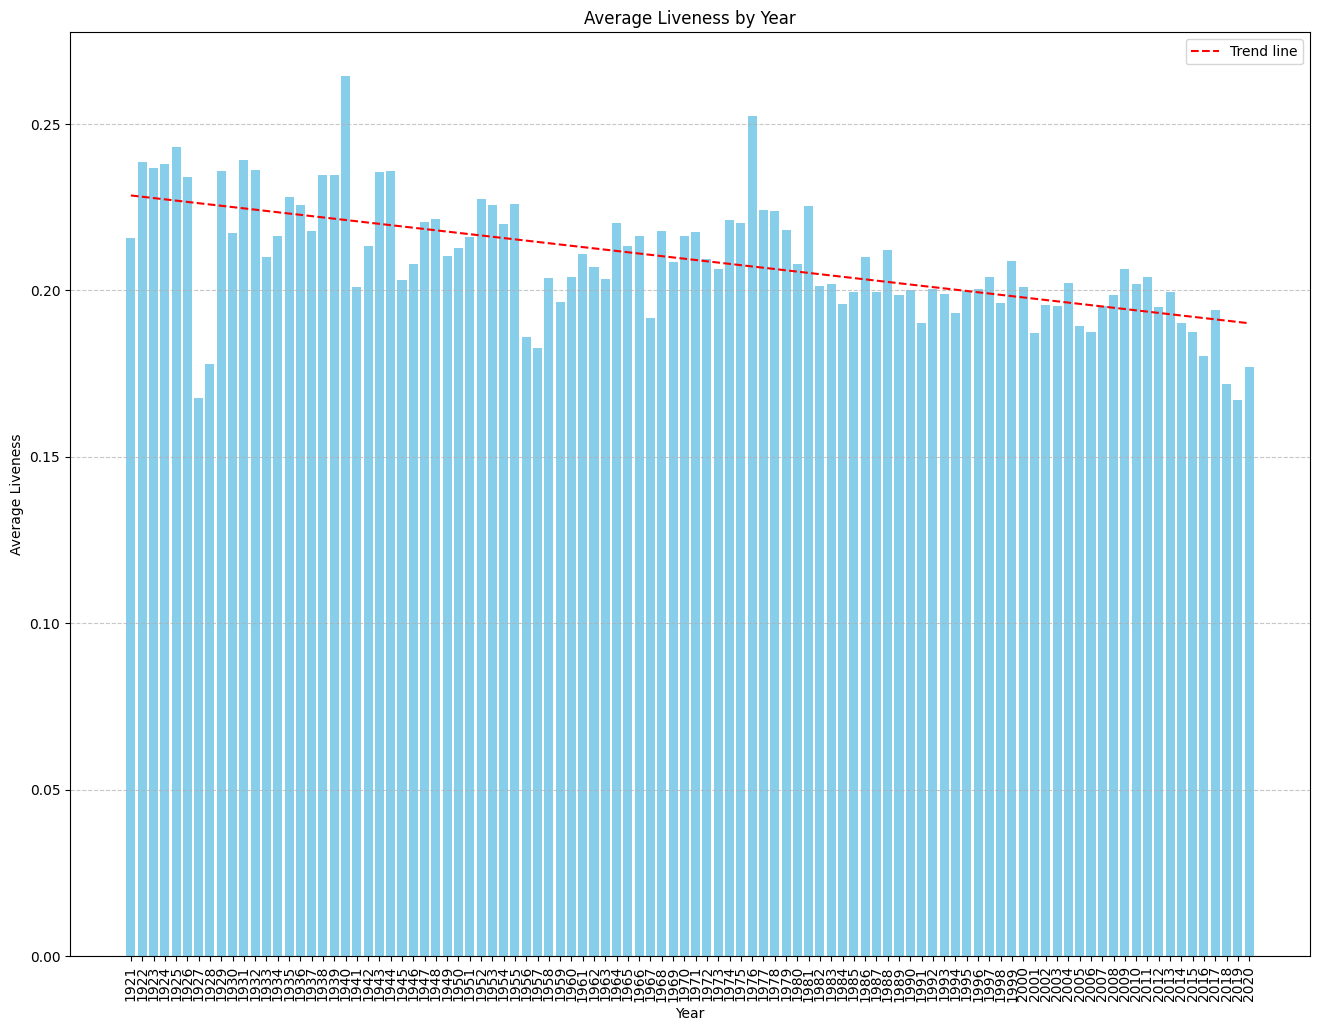

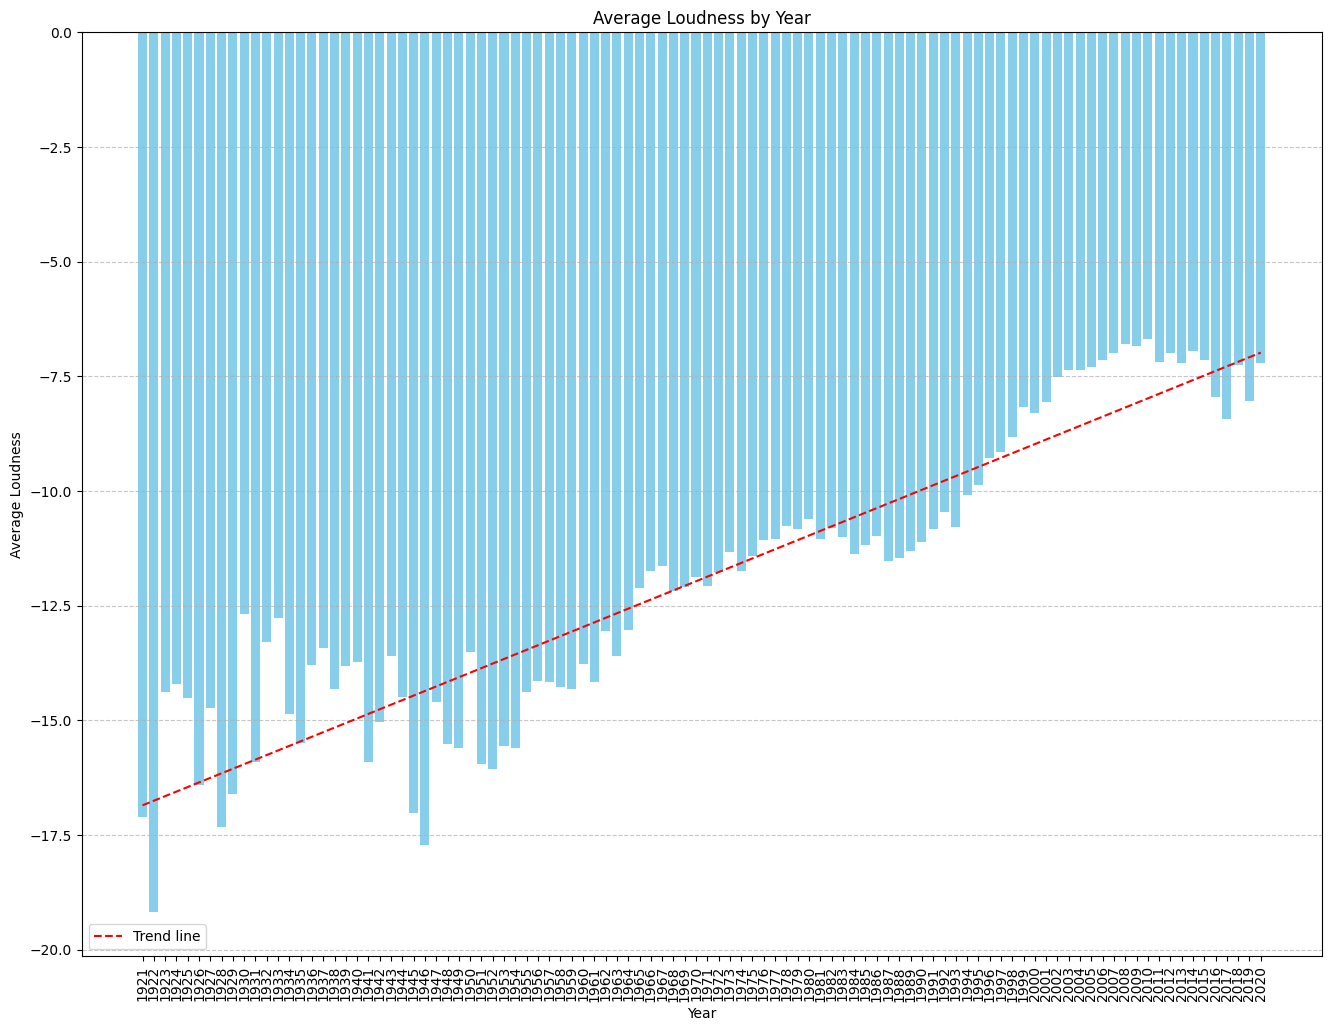

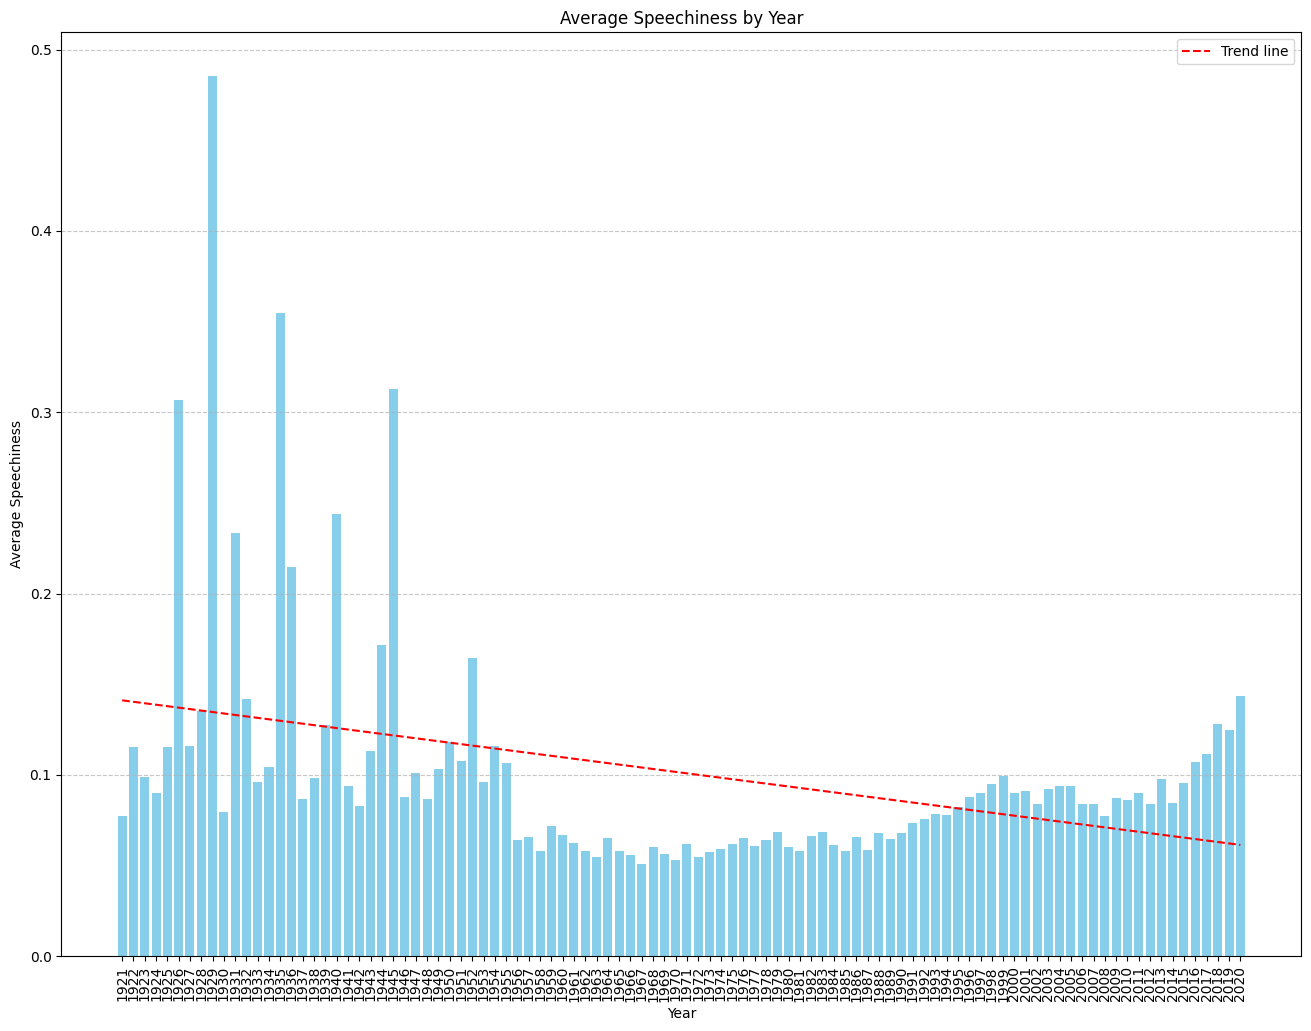

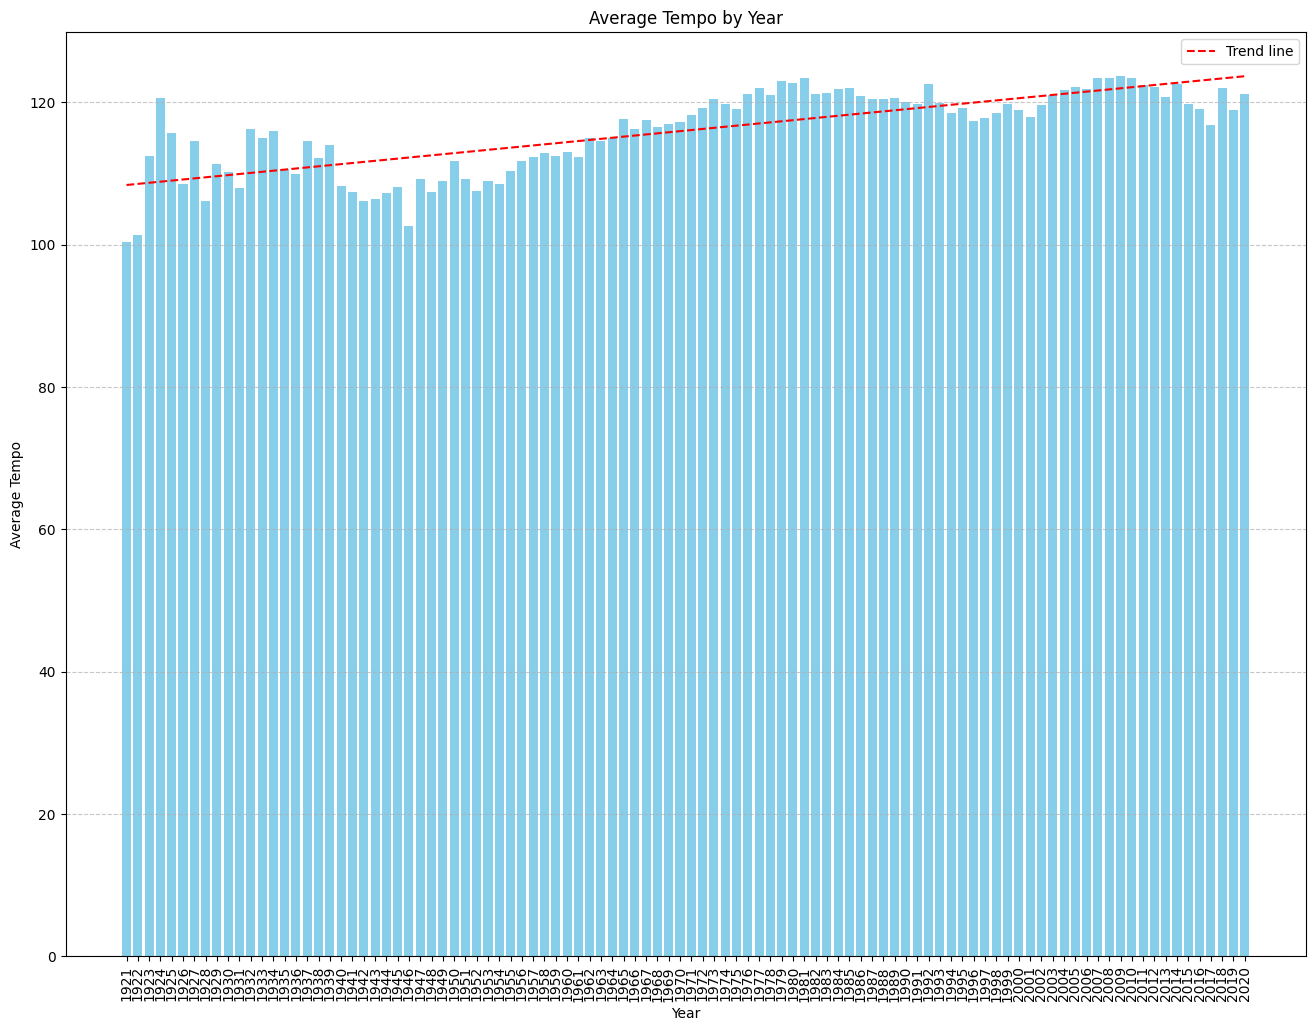

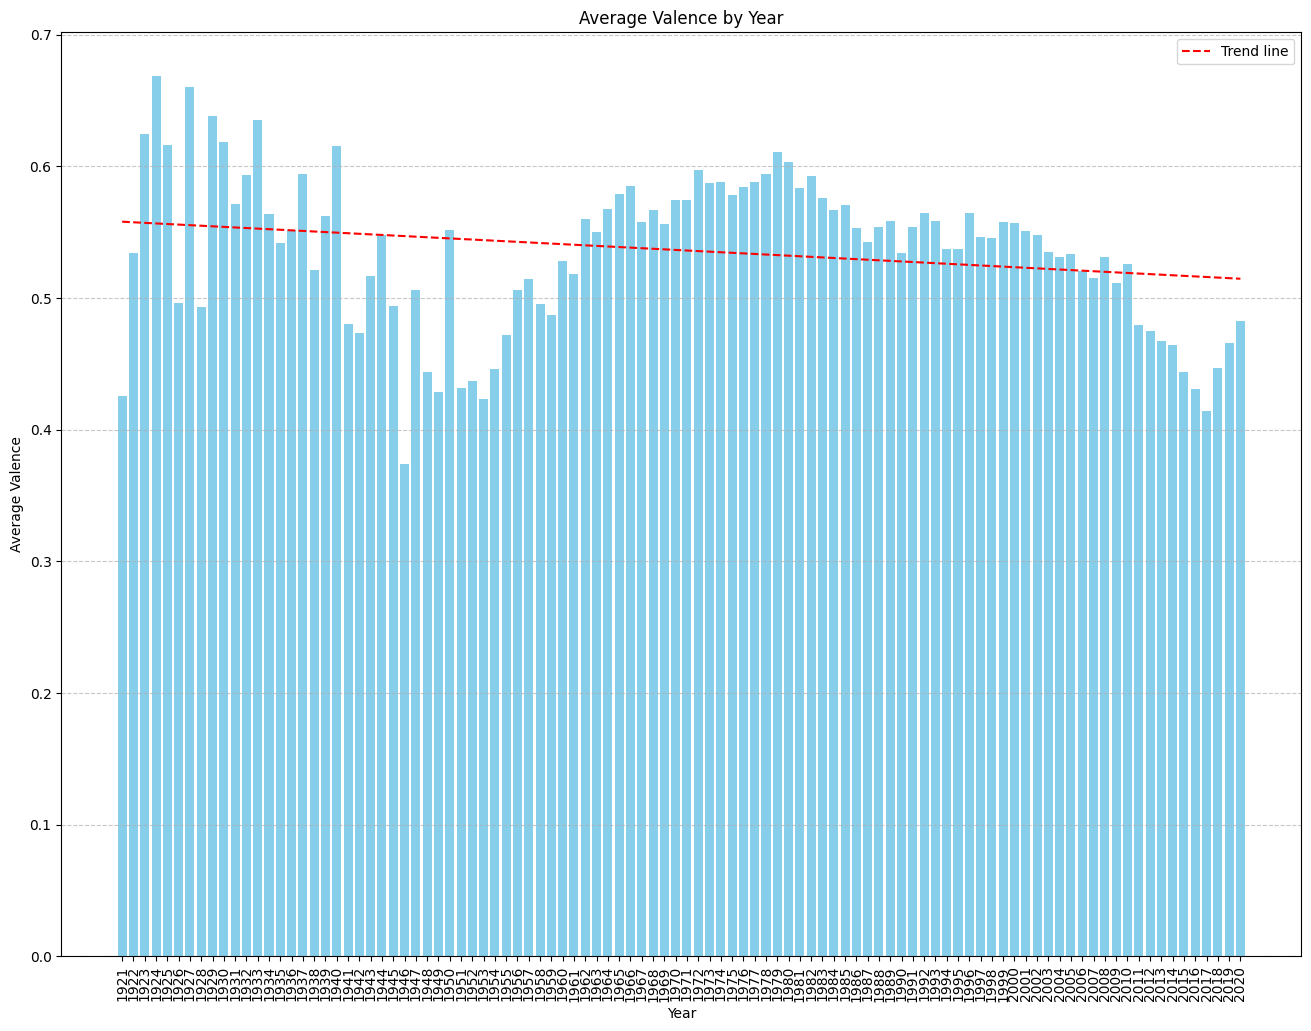

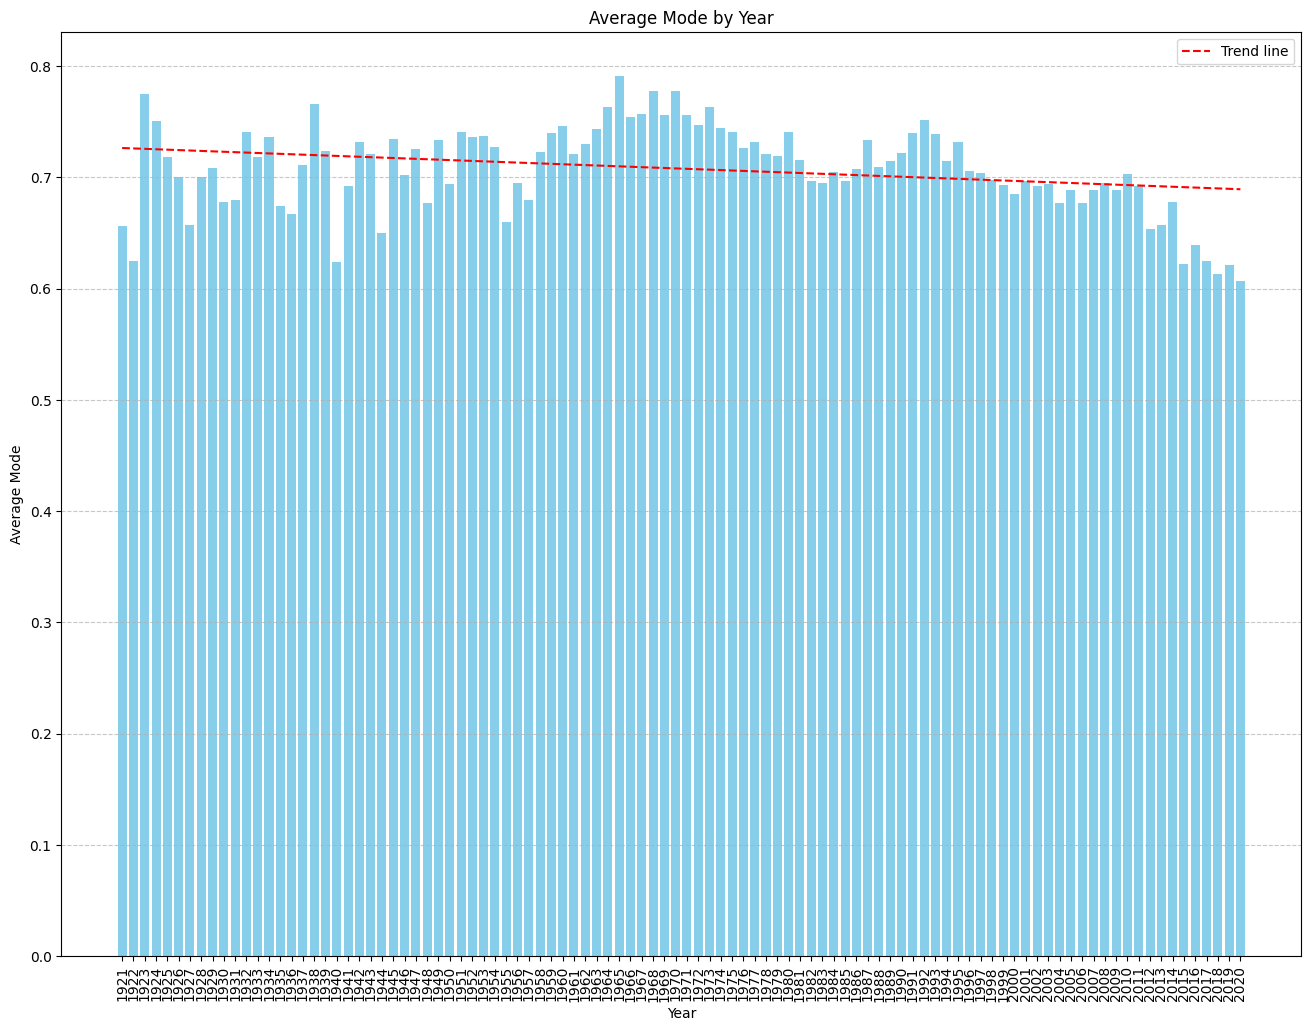

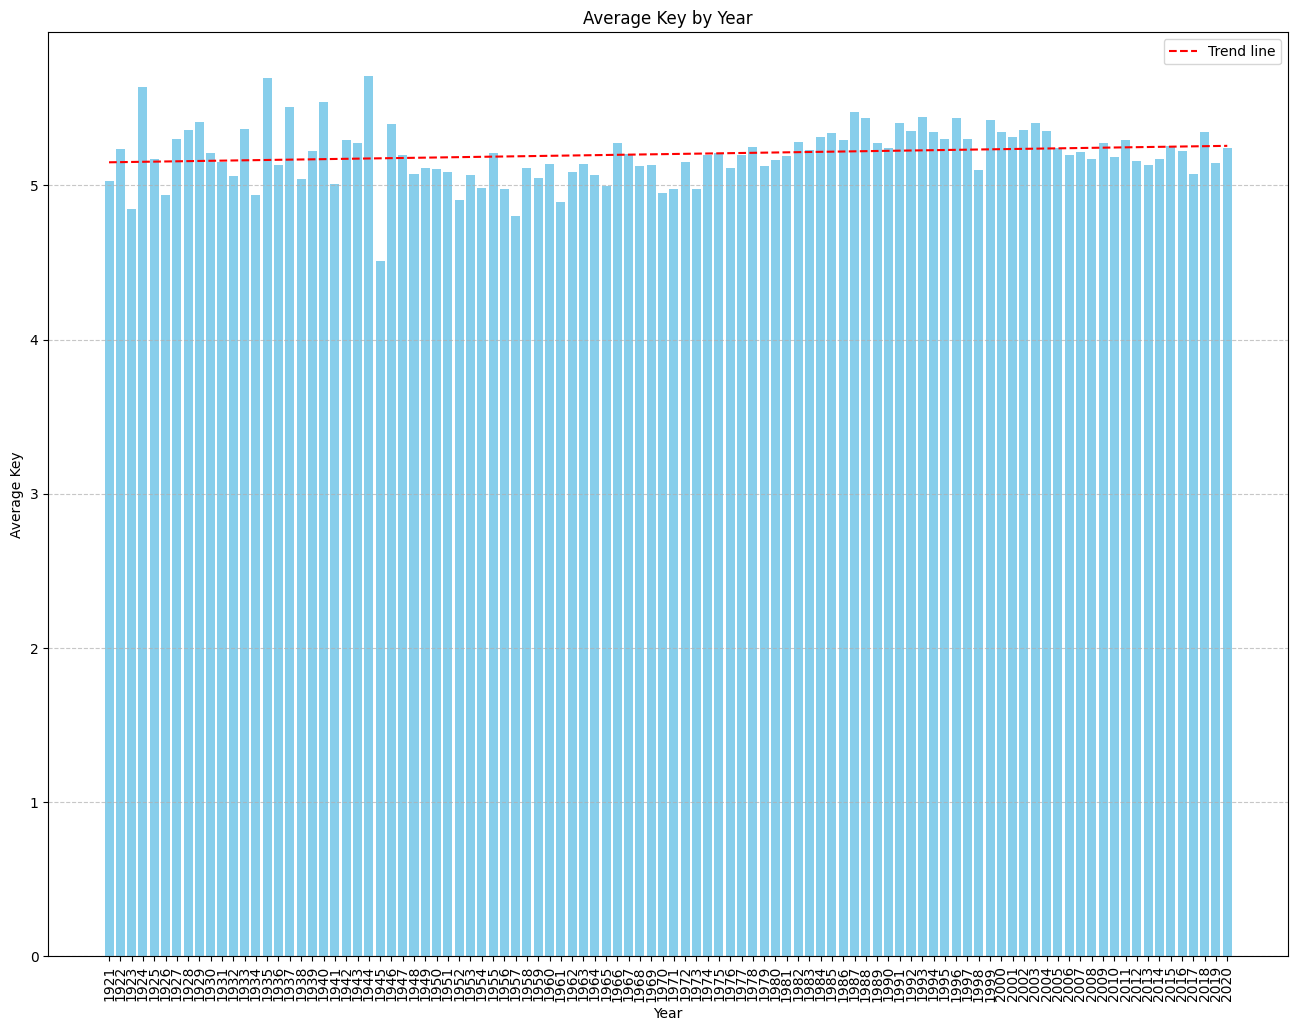

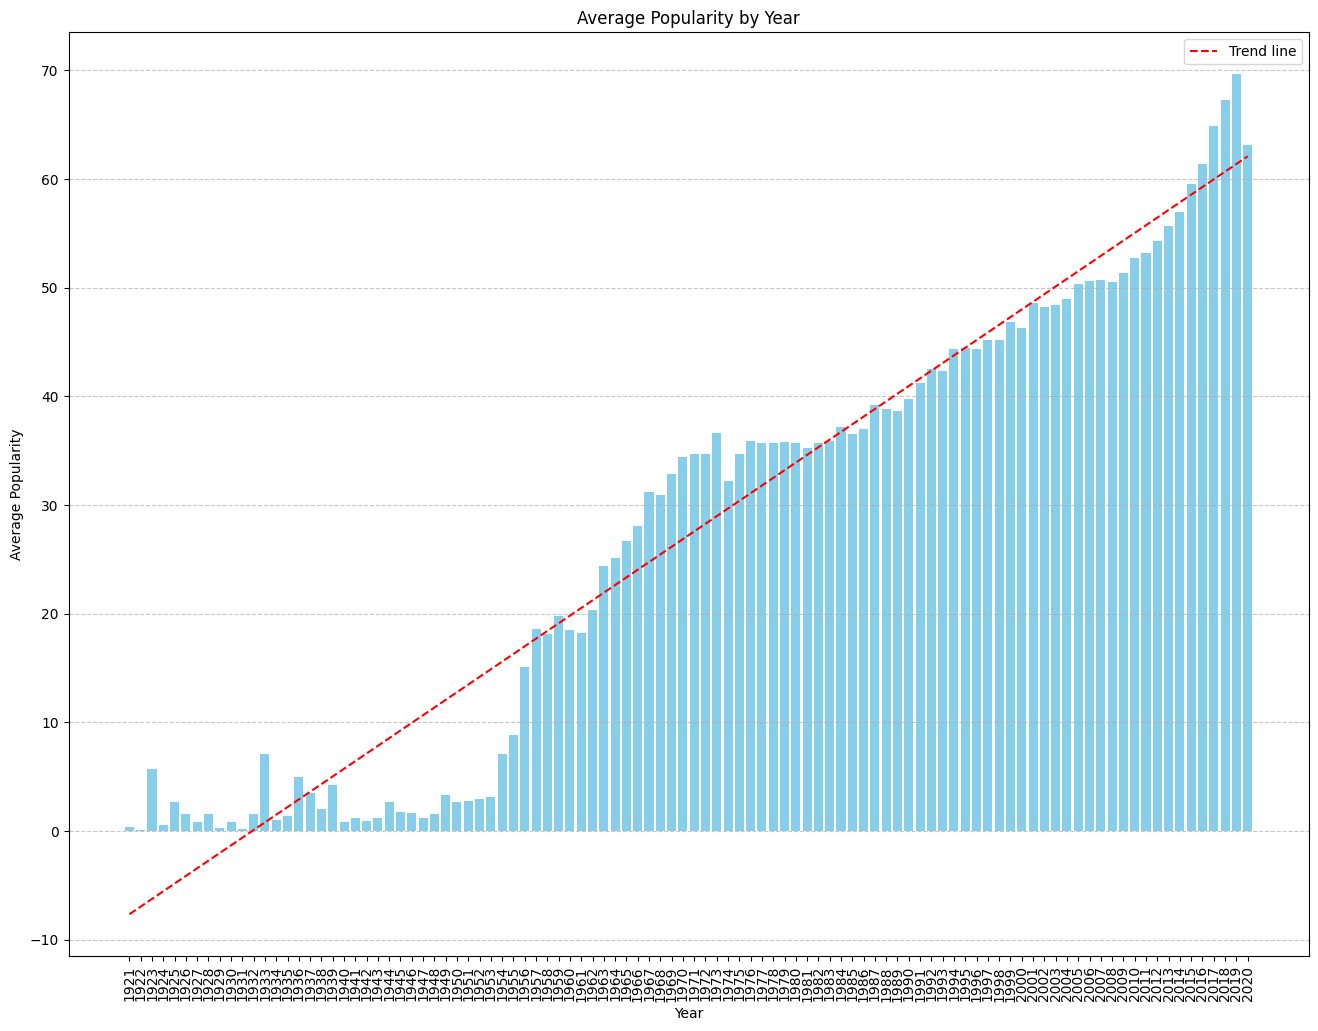

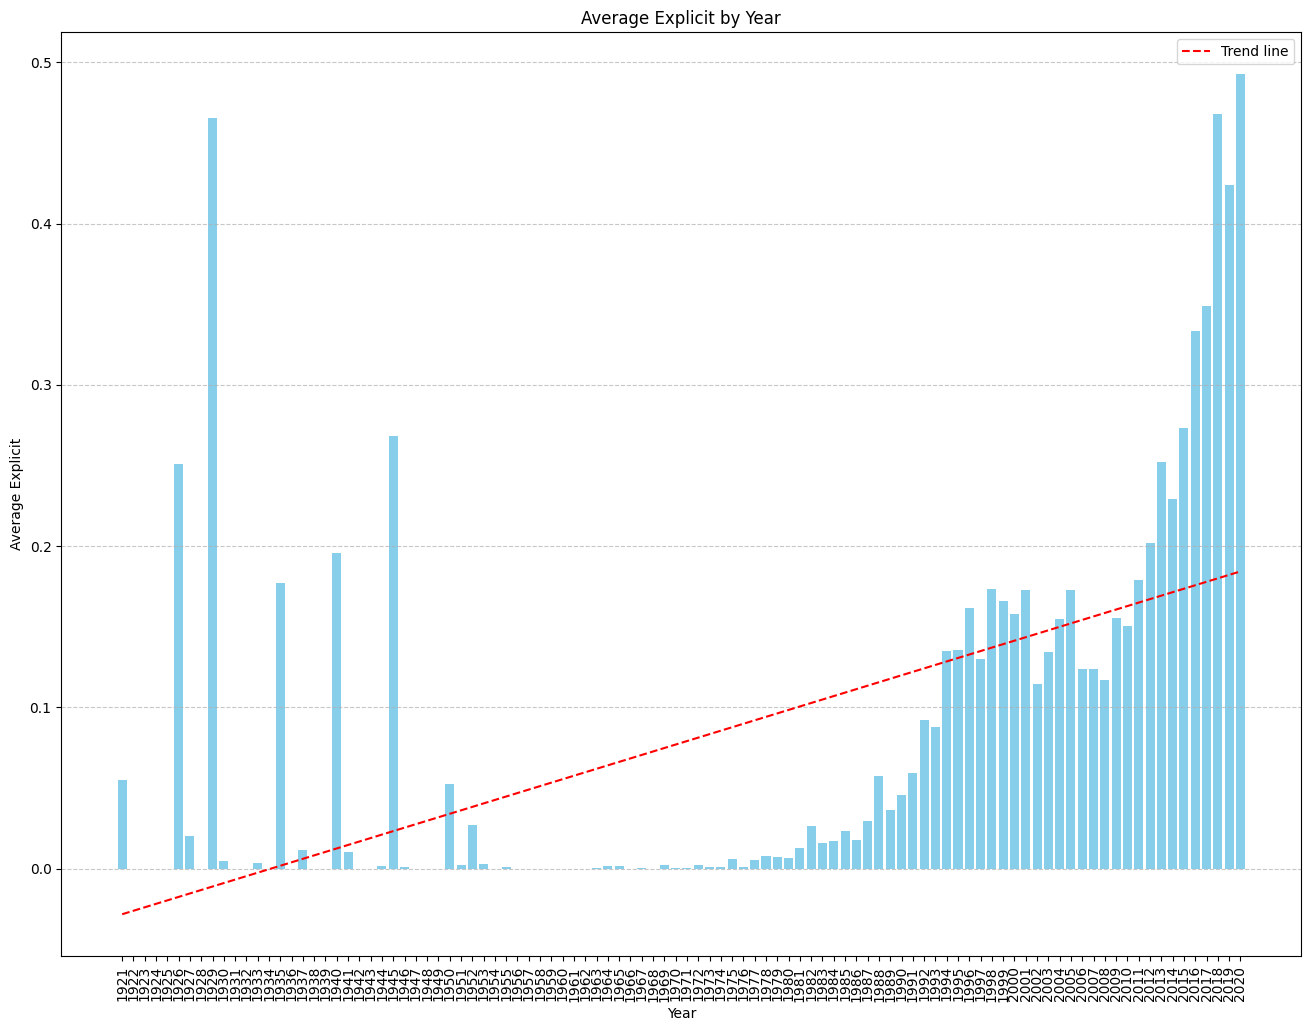

In [44]:
for column in main_df_copy.columns:  # Exclude the 'year' column

    average_by_year = main_df_copy.groupby(main_df_copy['year']).mean().reset_index()

    # Plotting
    plt.figure(figsize=(16,12))
    plt.bar(average_by_year['year'], average_by_year[column], color='skyblue')
    plt.xlabel('Year')
    plt.ylabel(f'Average {column.capitalize()}')
    plt.title(f'Average {column.capitalize()} by Year')
    plt.xticks(average_by_year['year'], rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Adding trend line
    x = average_by_year['year']
    y = average_by_year[column]
    coefficients = np.polyfit(x, y, 1)
    trendline = np.poly1d(coefficients)
    plt.plot(x, trendline(x), color='red', linestyle='--', label='Trend line')
    plt.legend()

    plt.show()


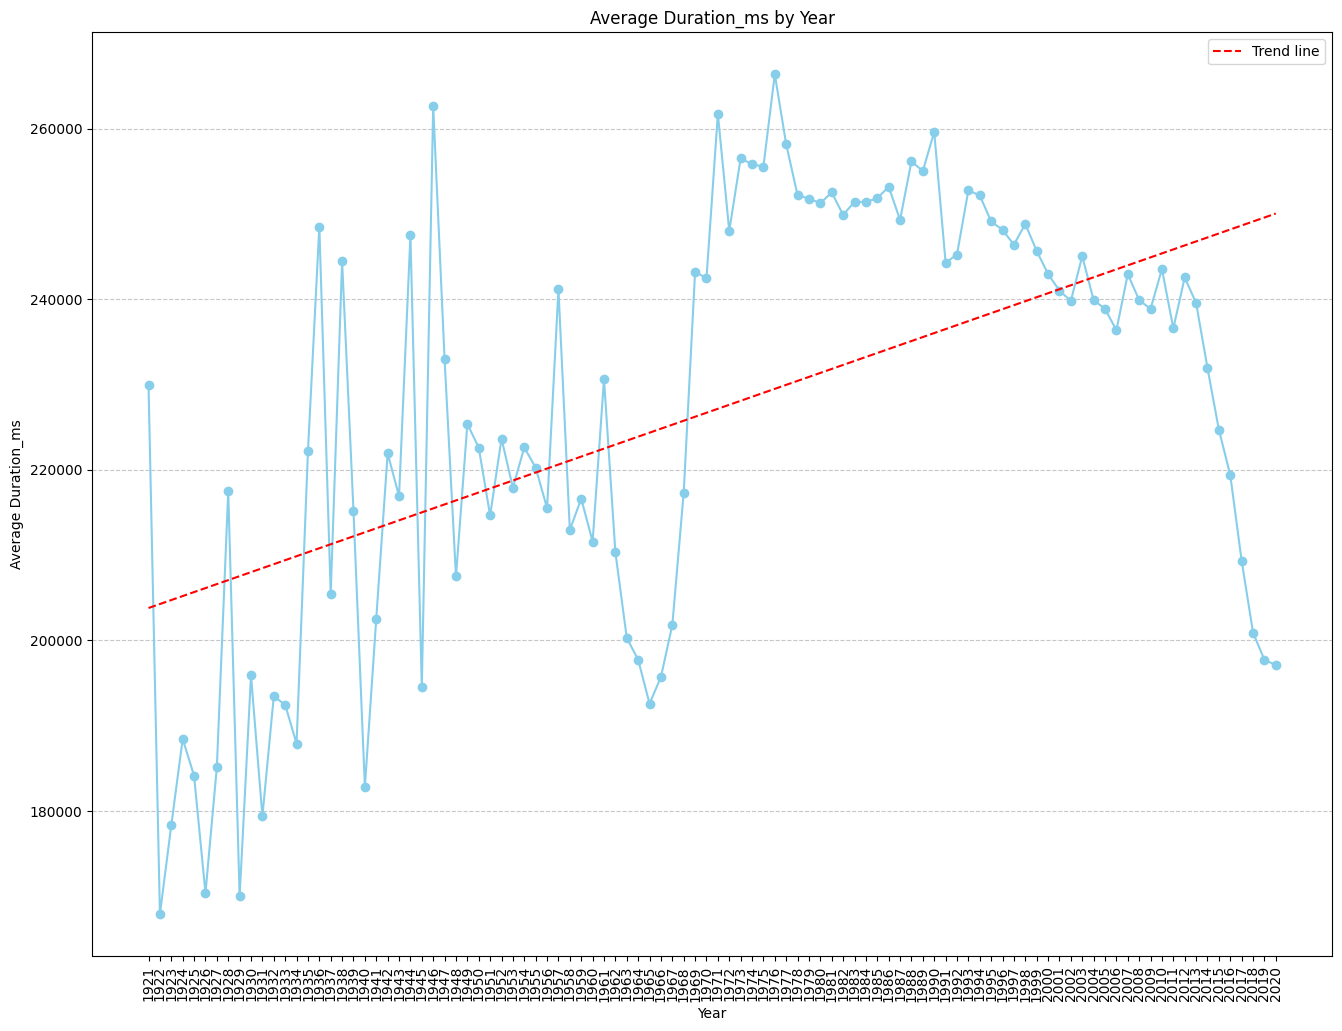

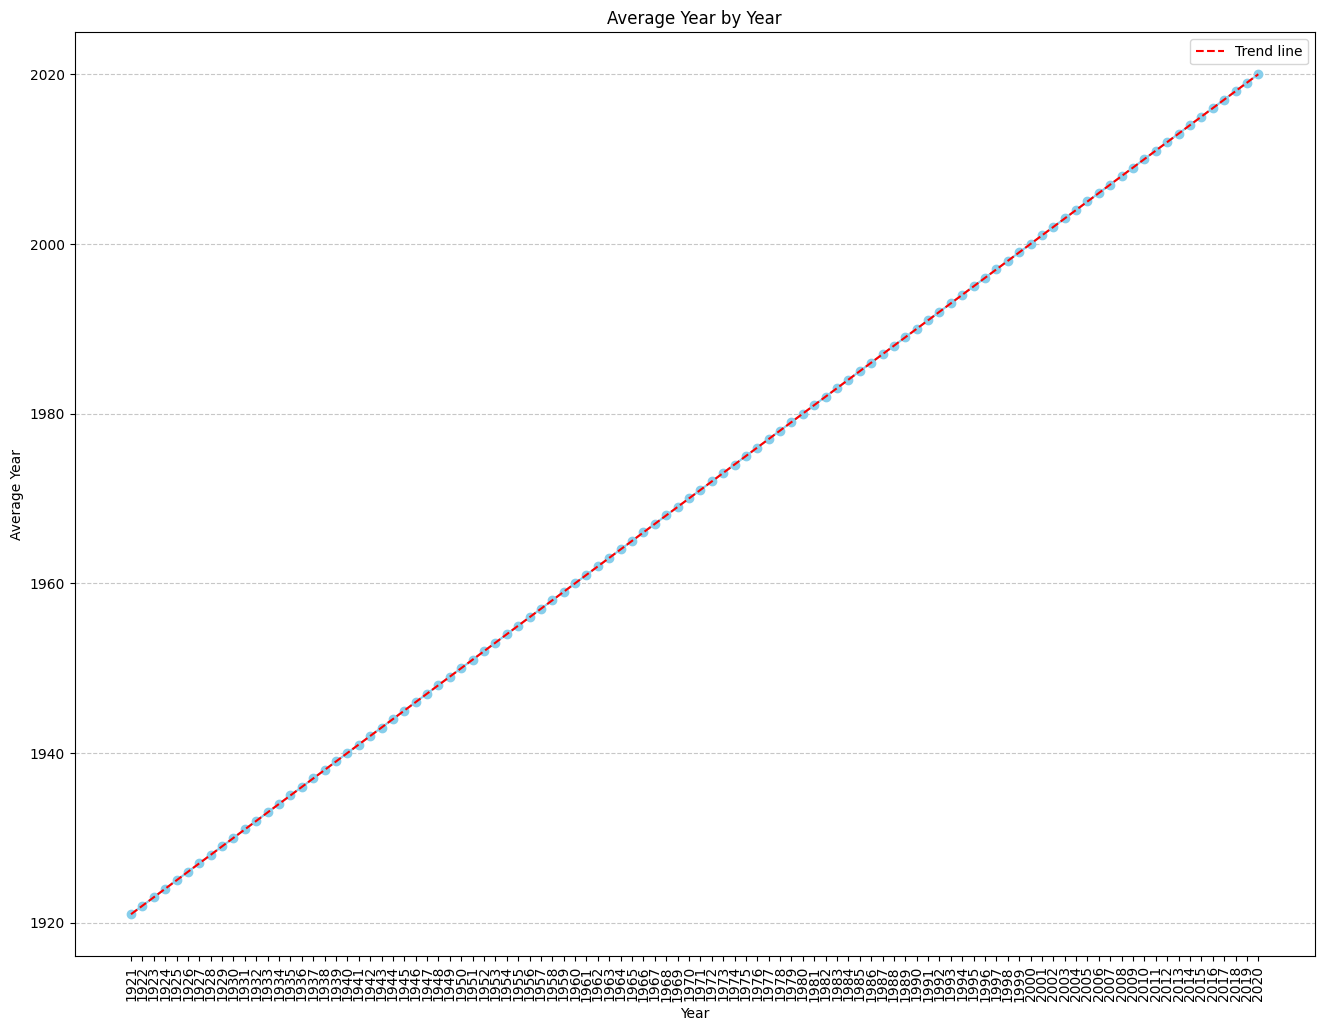

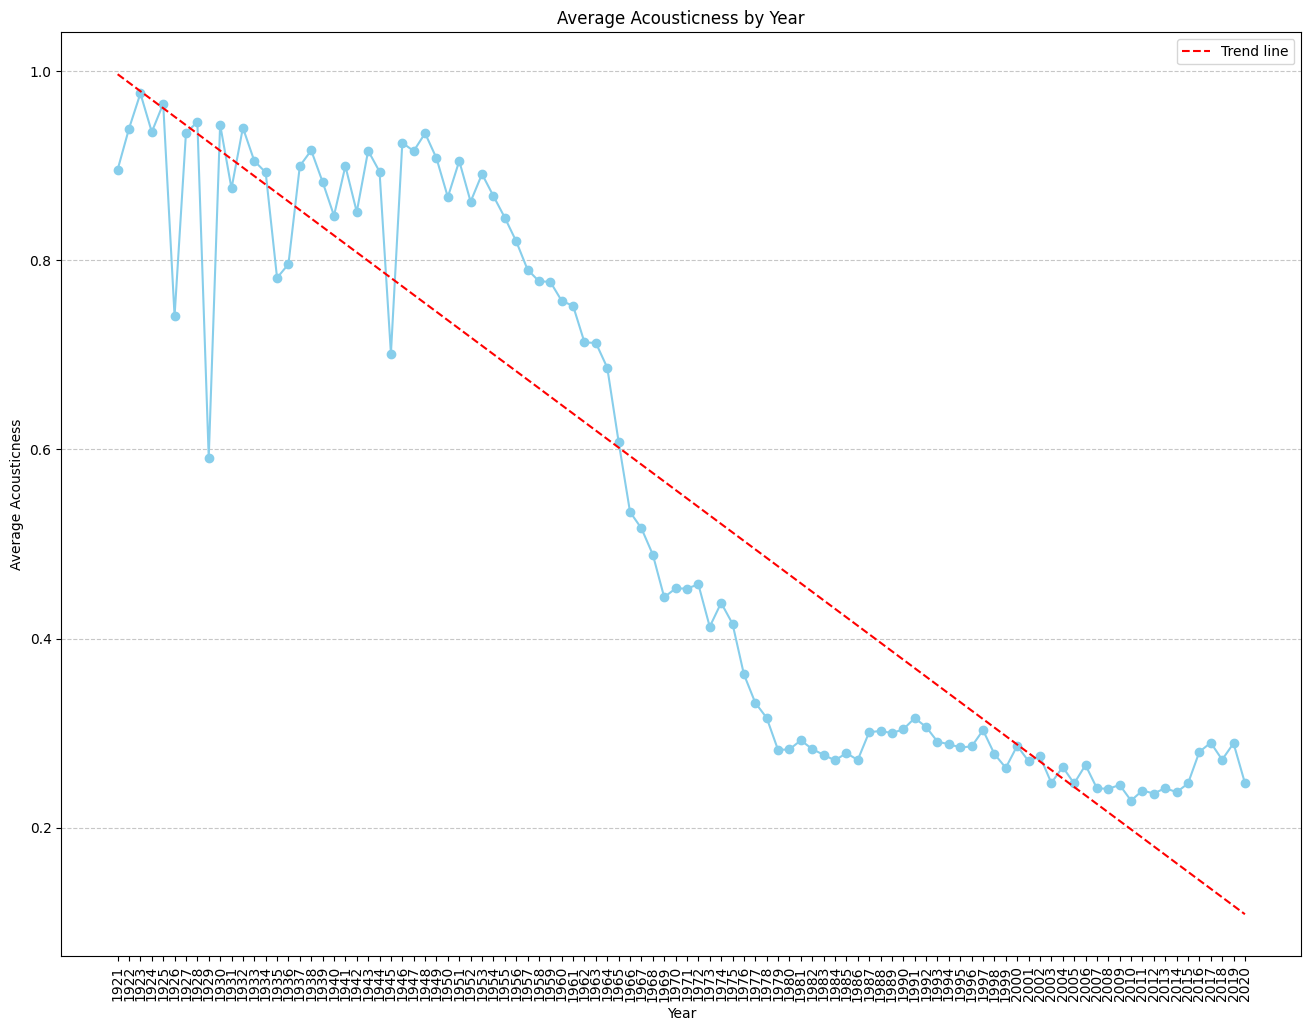

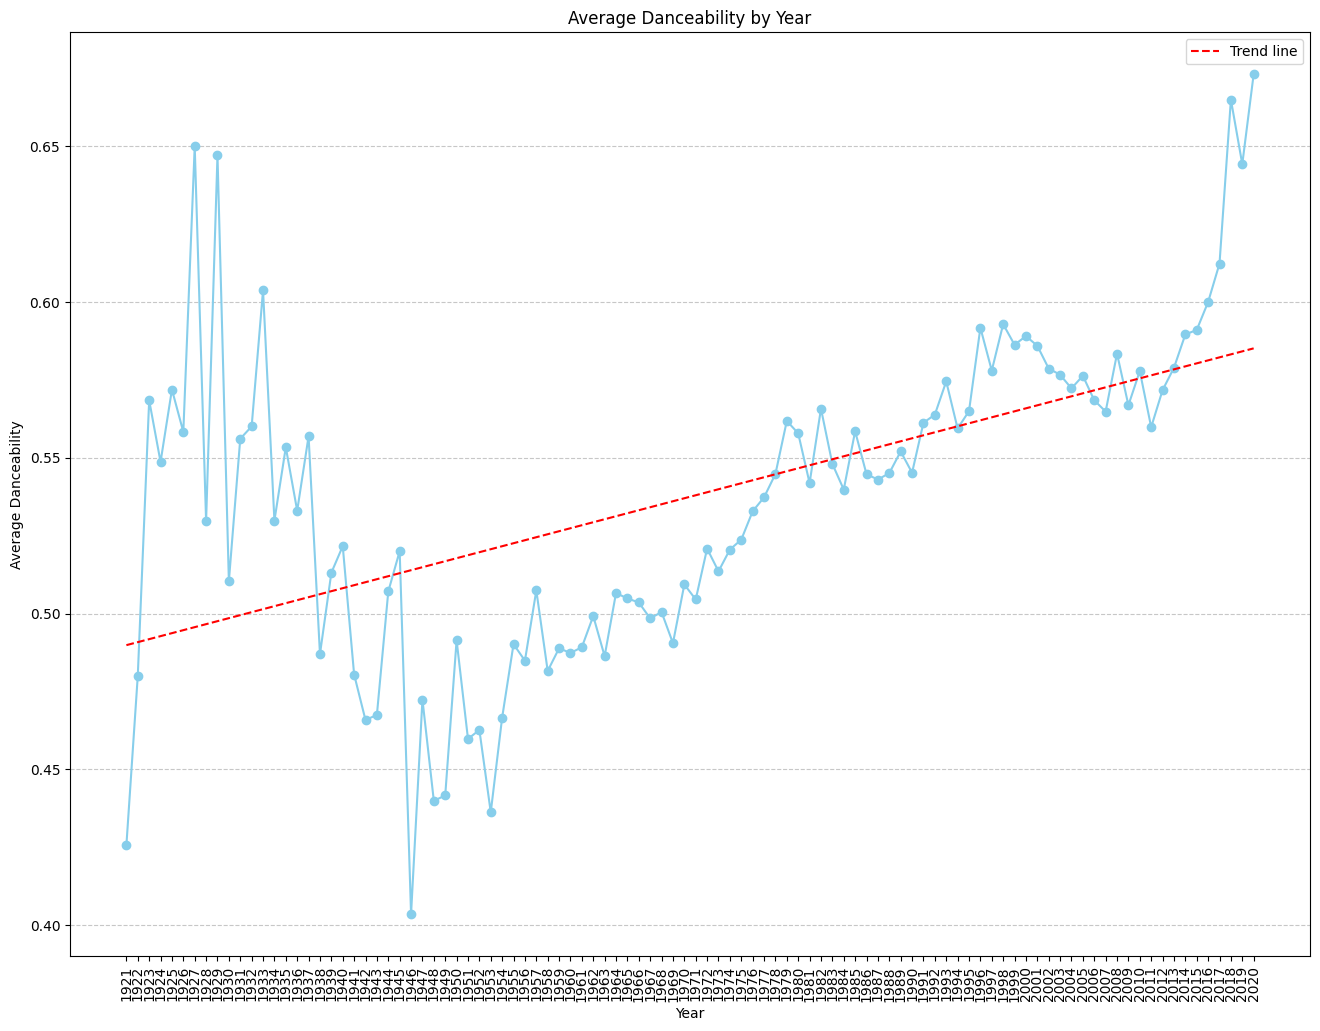

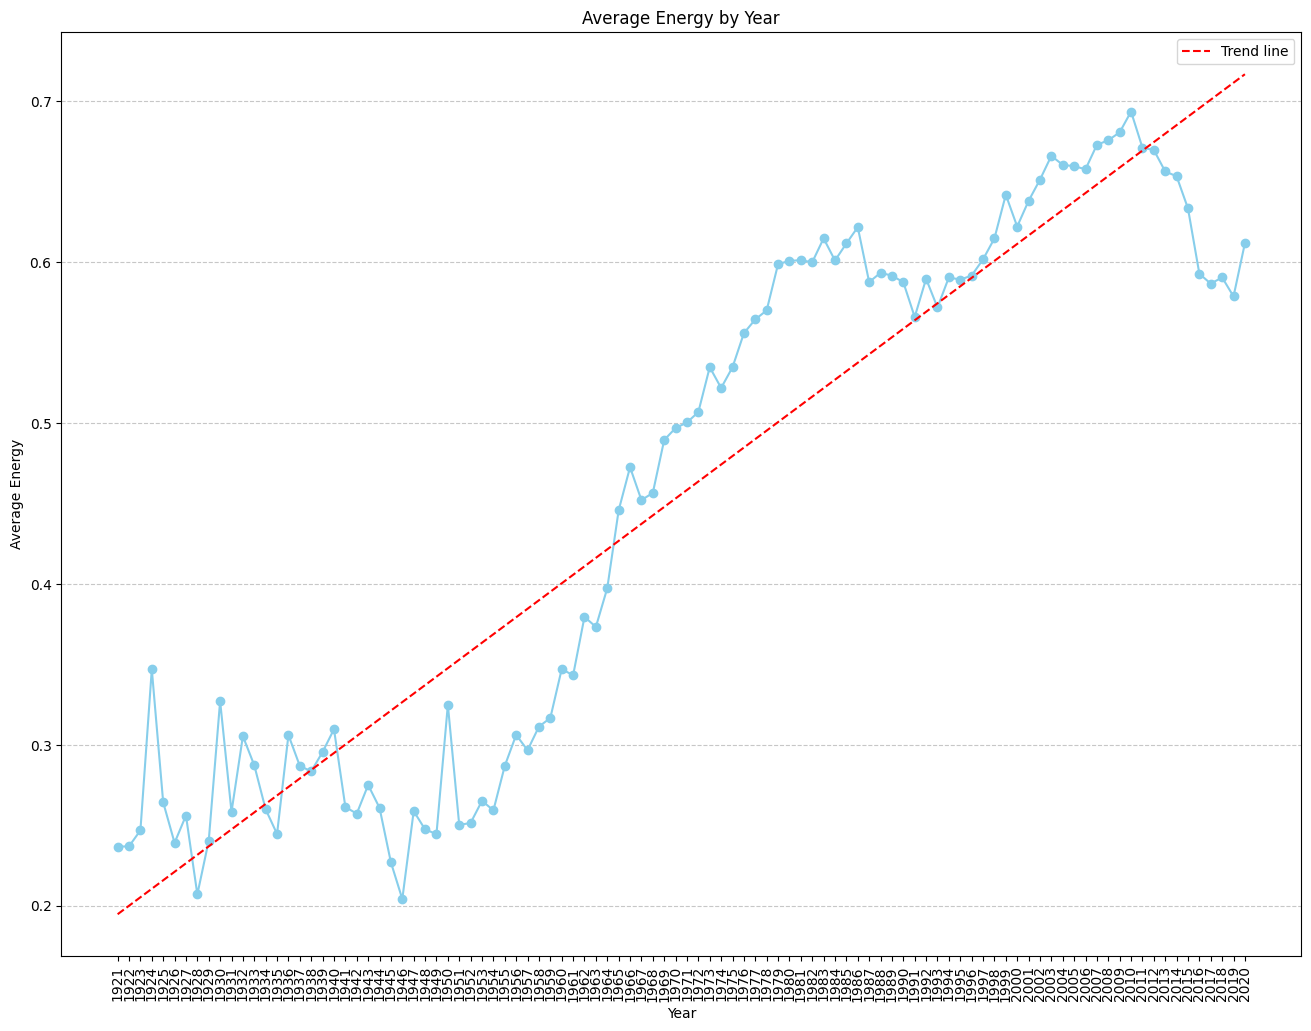

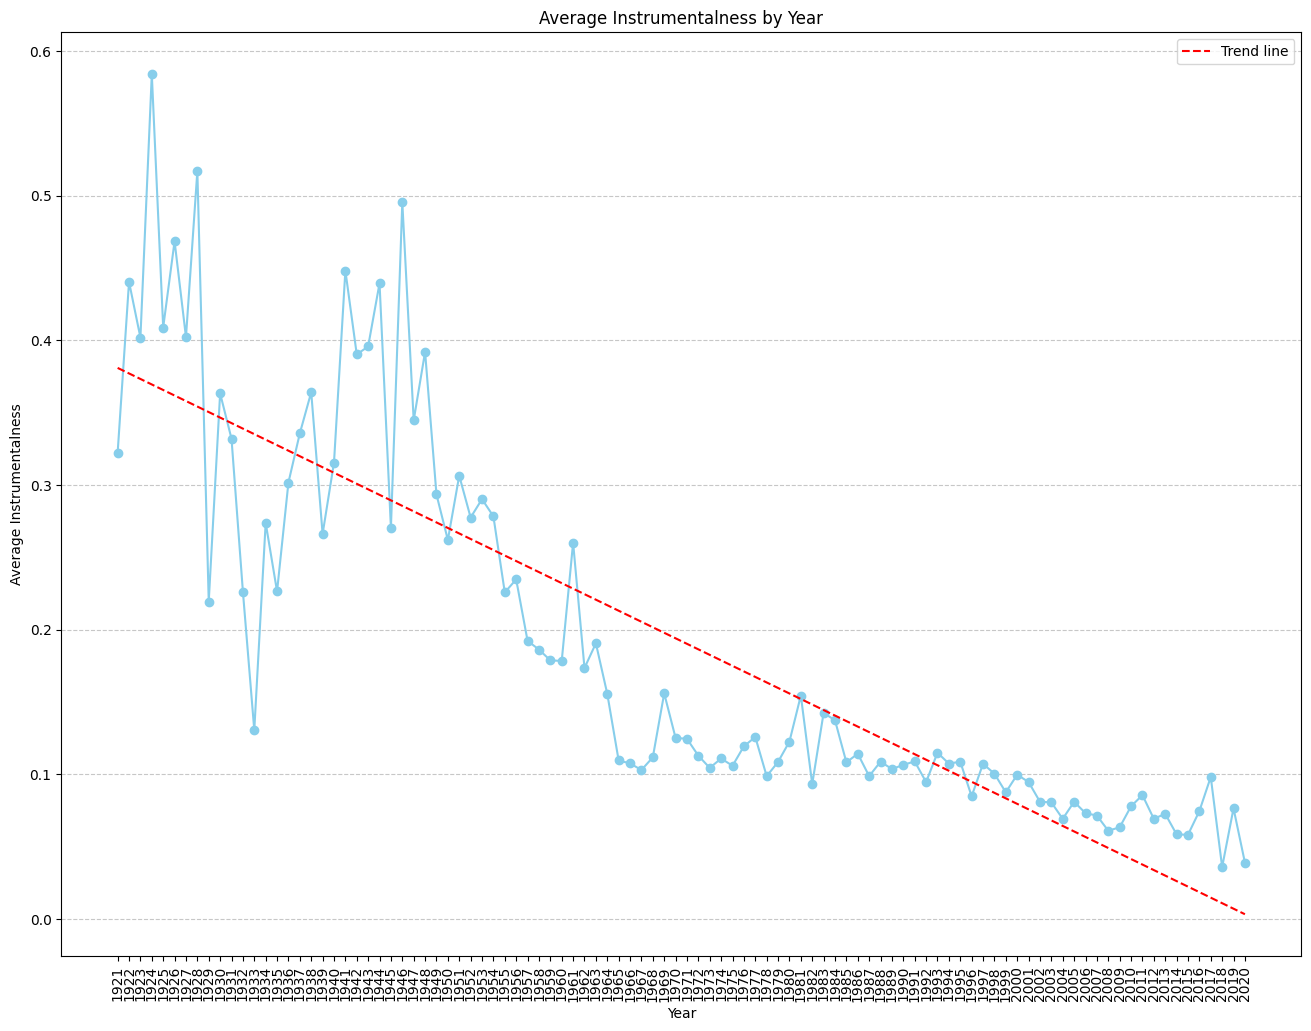

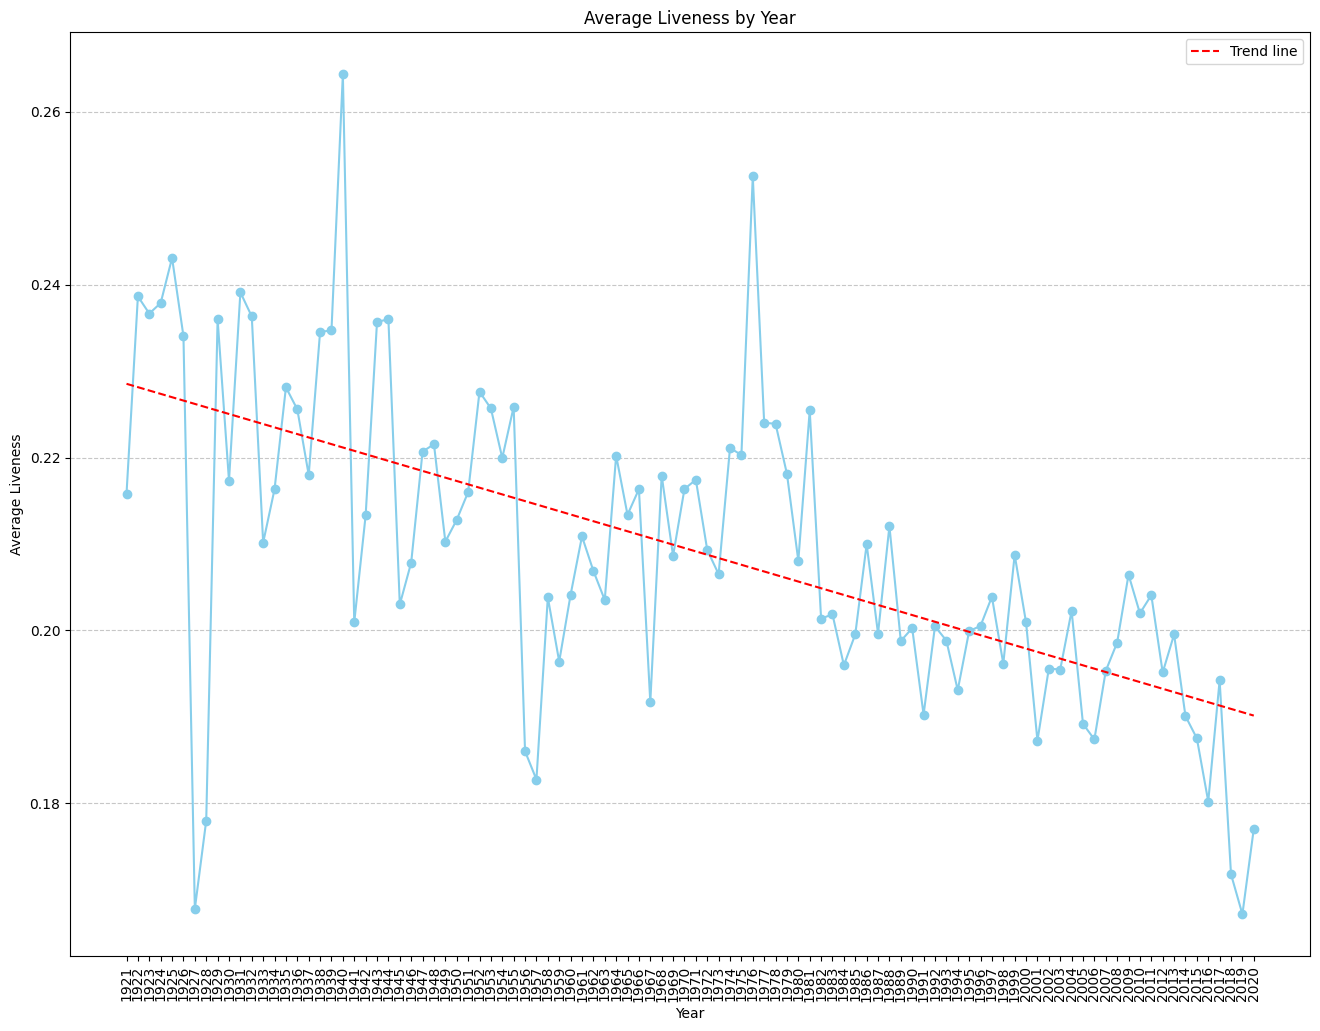

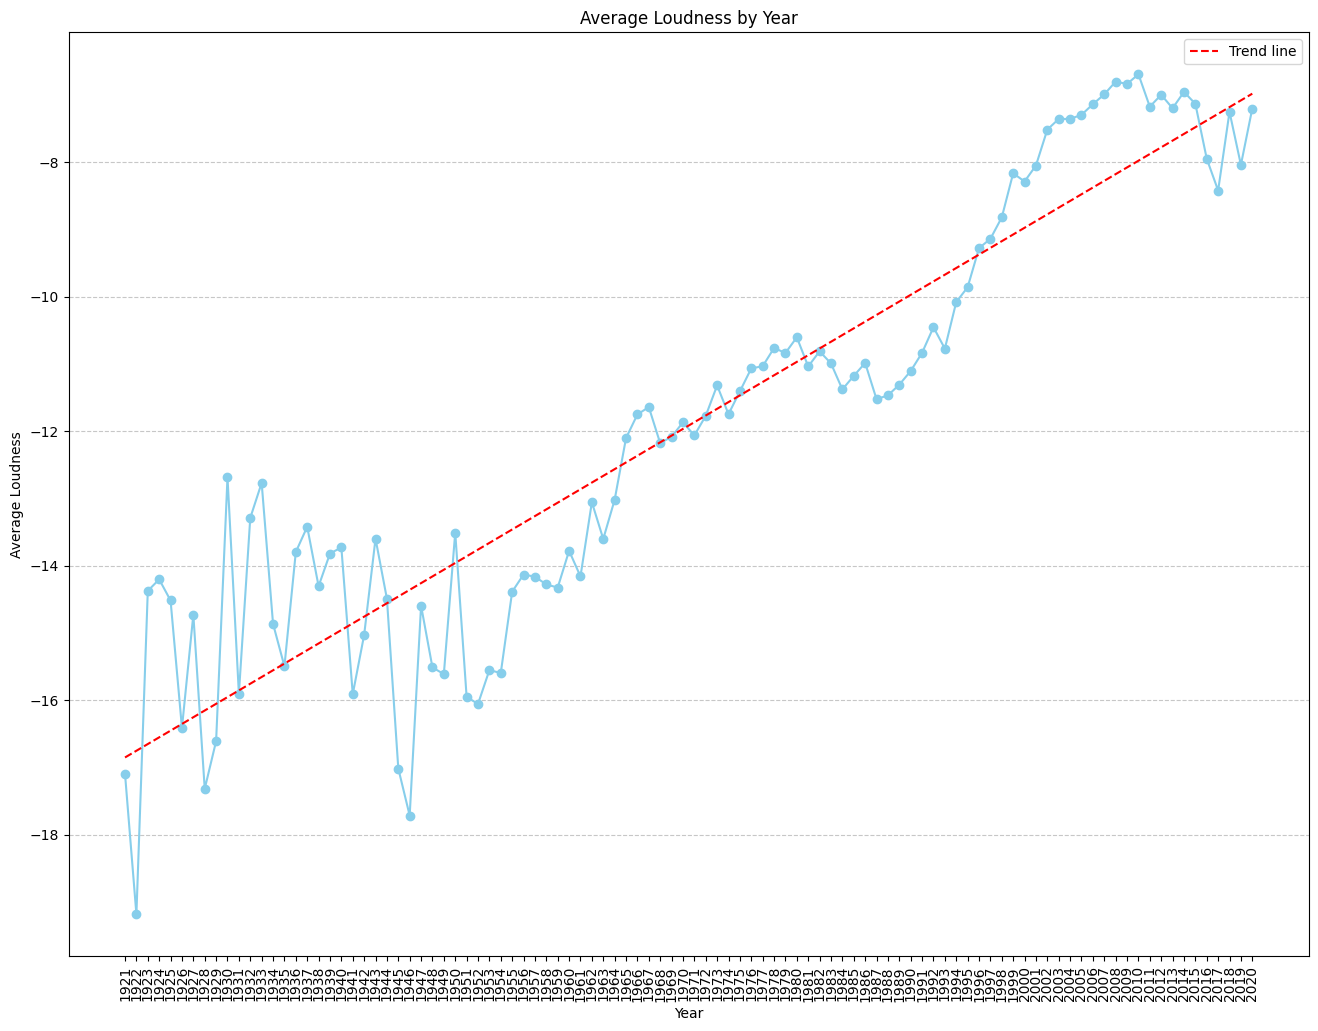

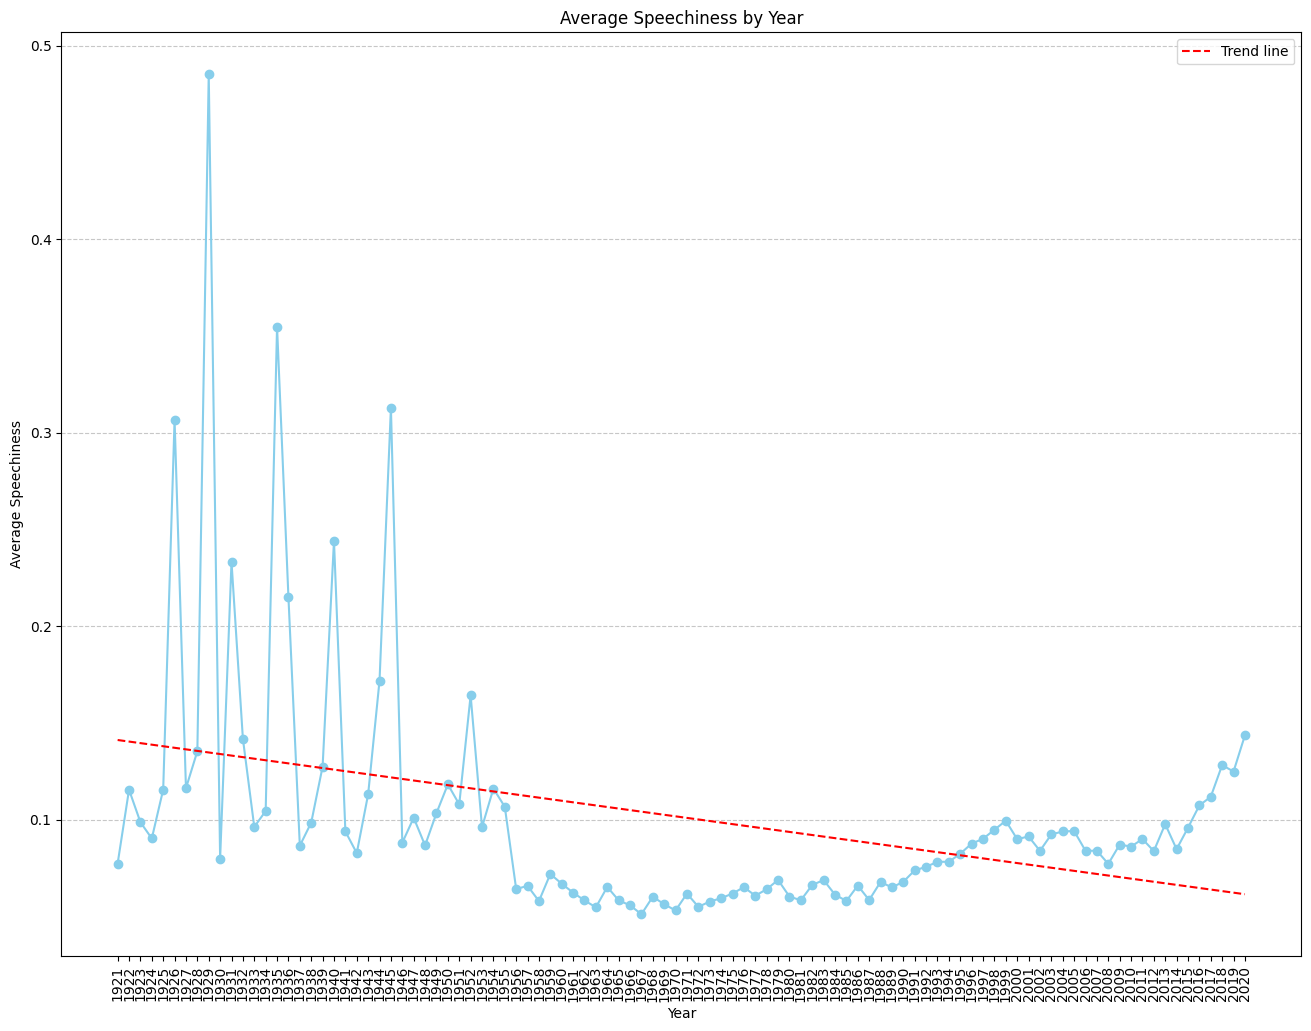

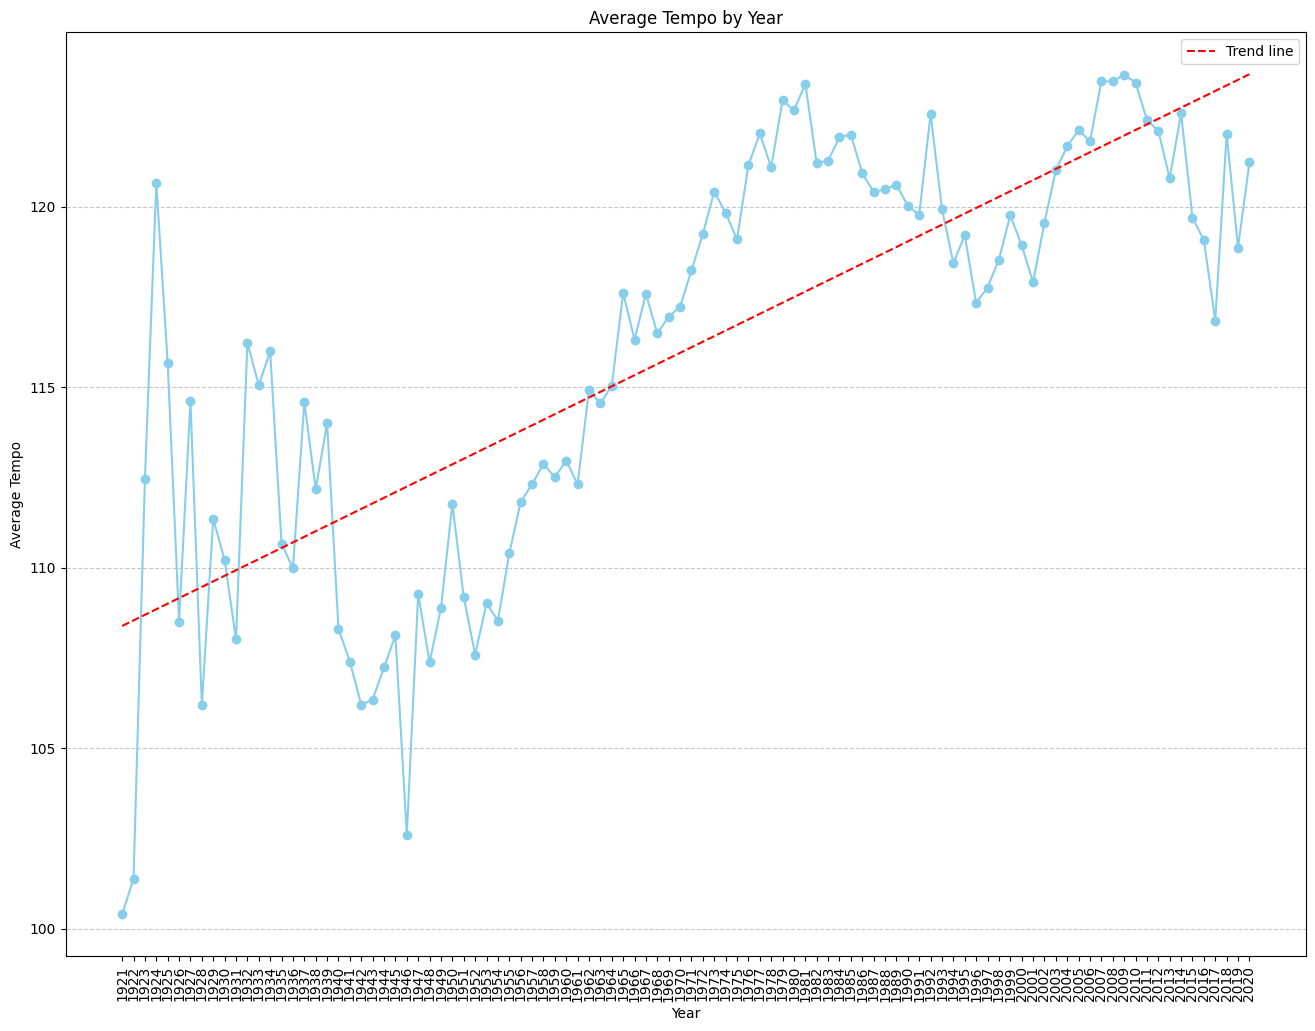

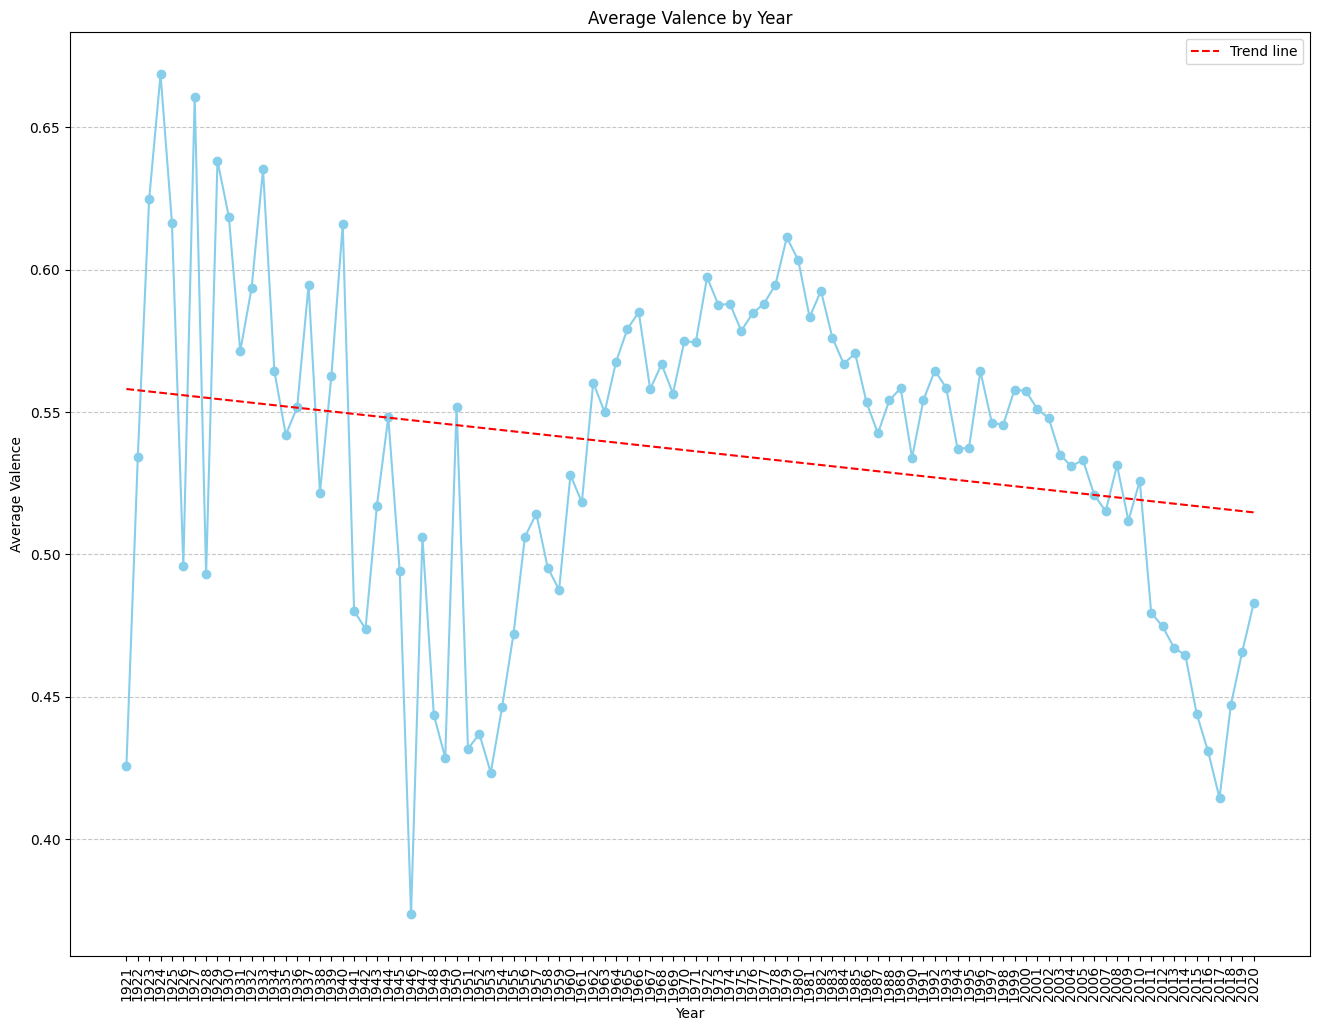

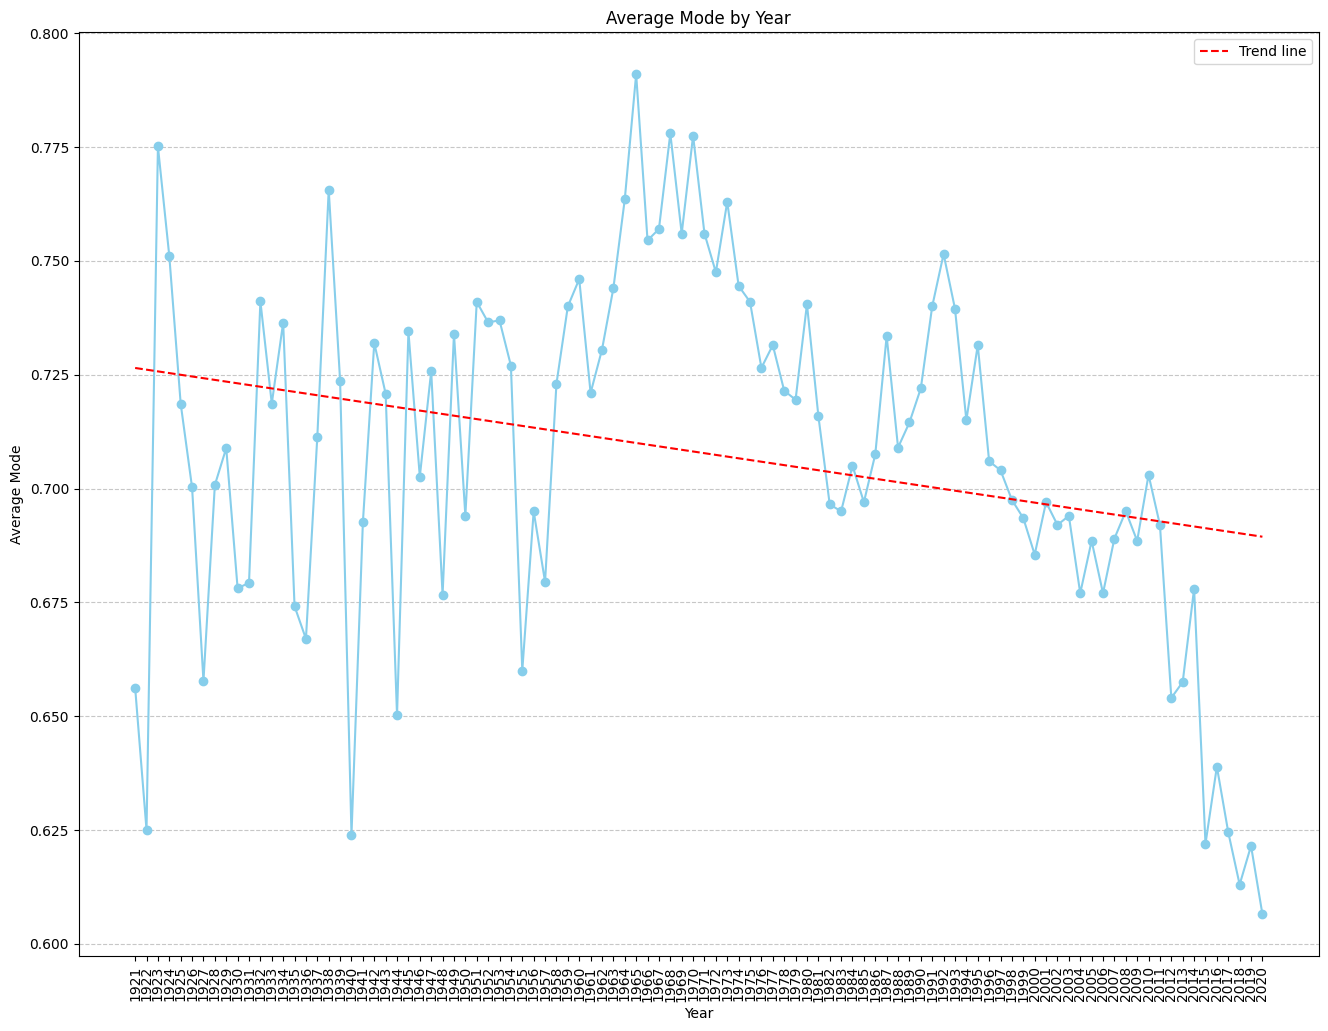

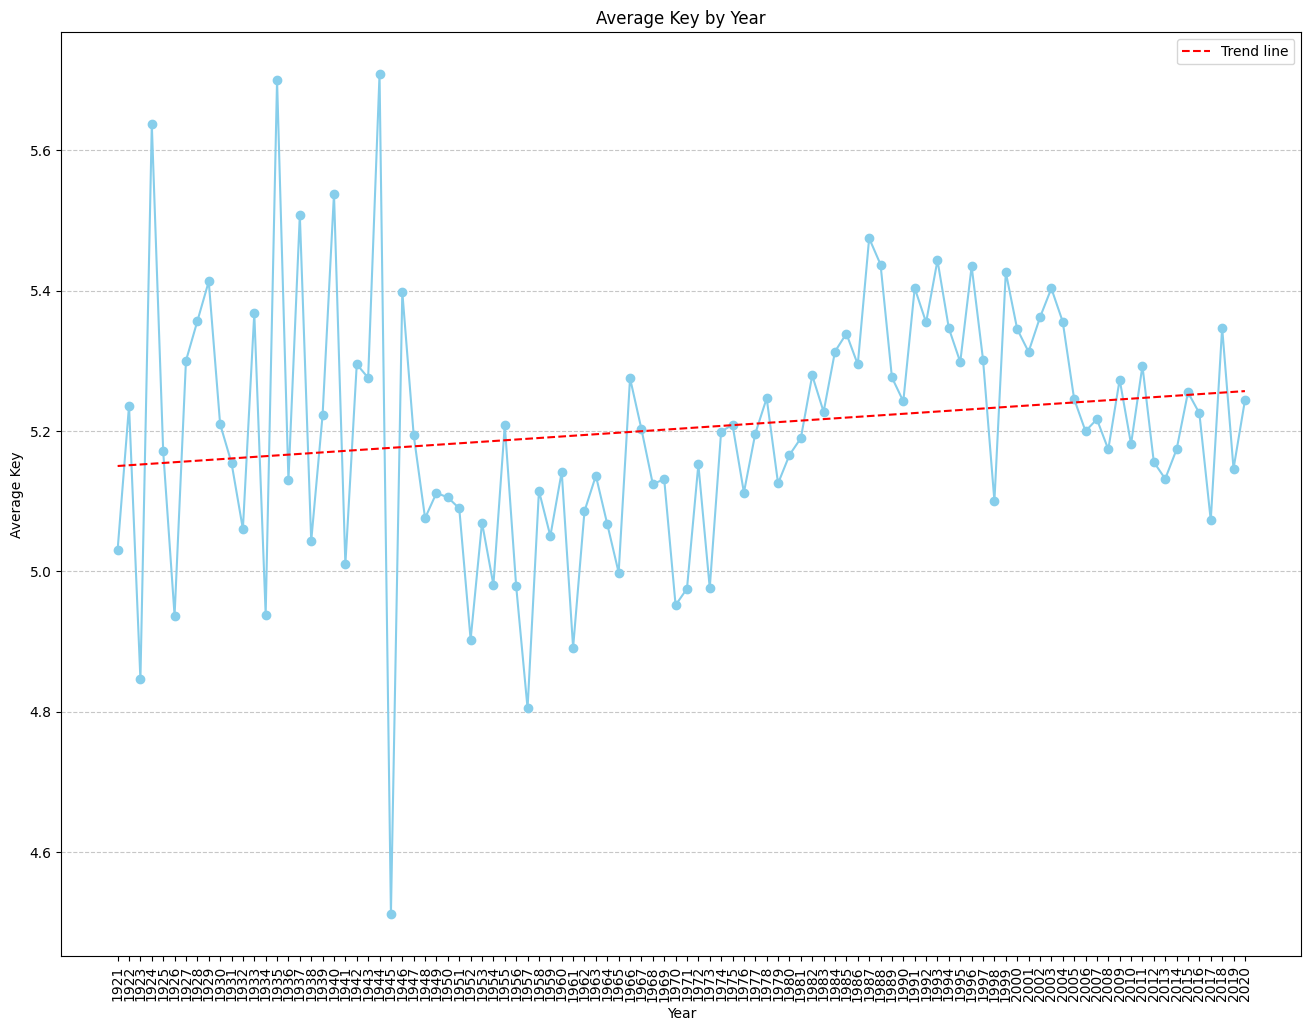

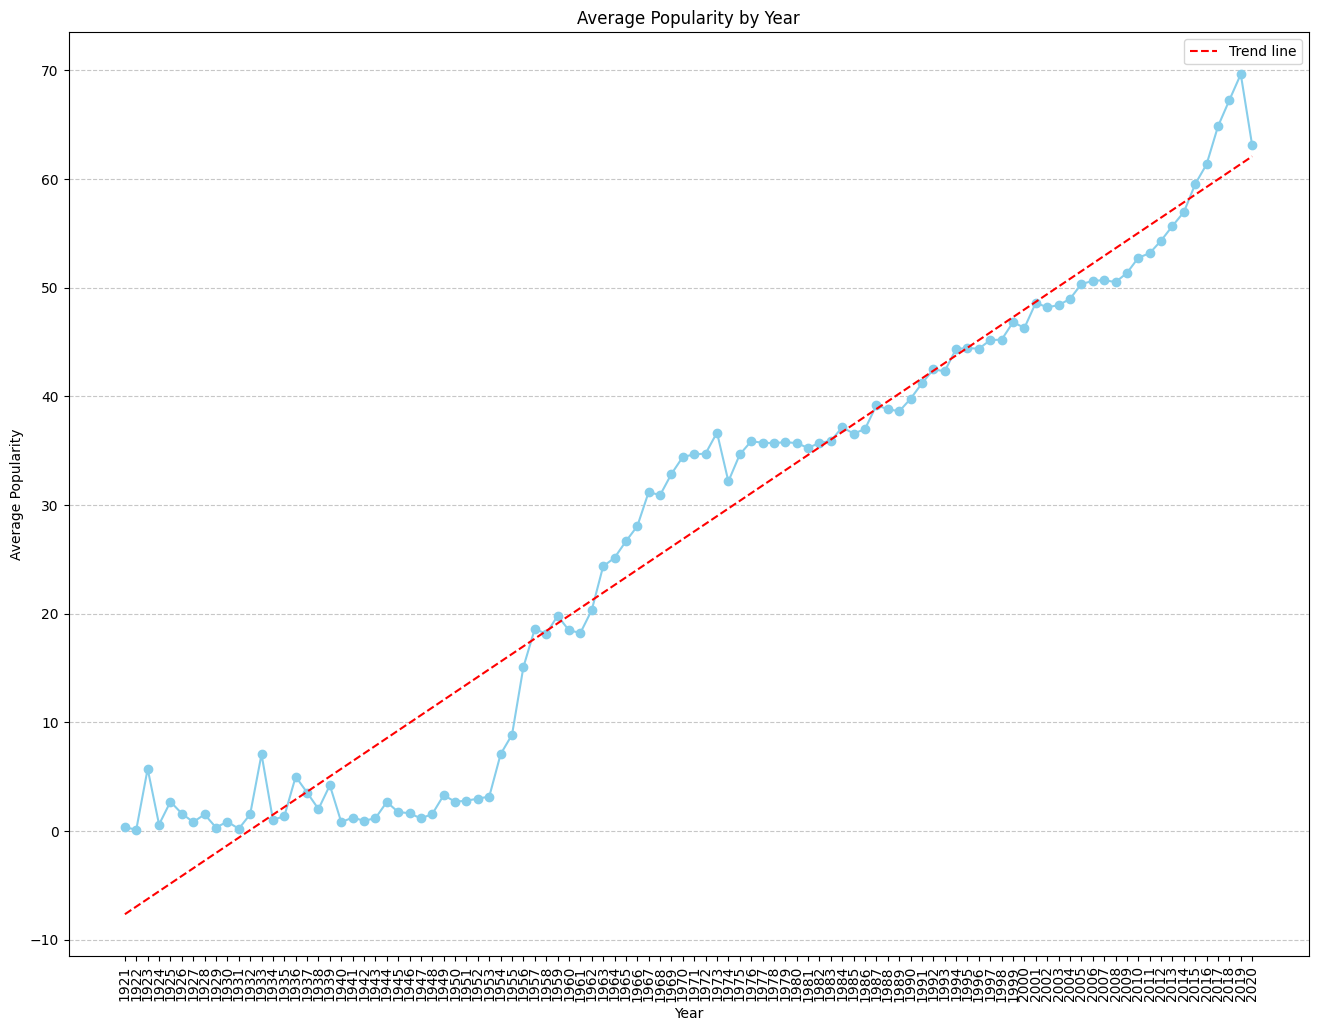

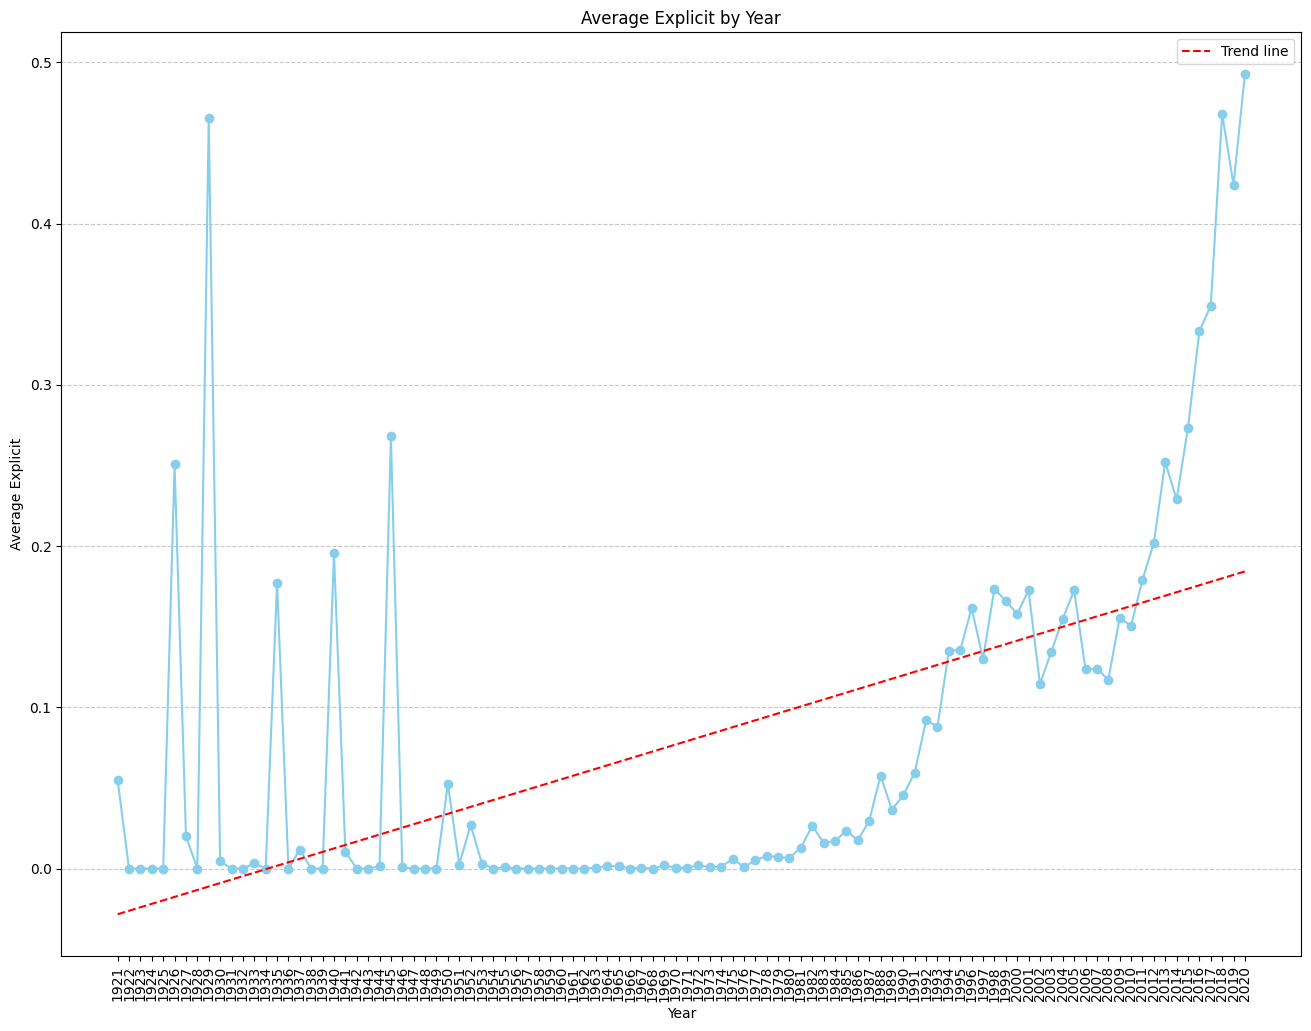

In [48]:
for column in main_df_copy.columns:
    average_by_year = main_df_copy.groupby(main_df_copy['year']).mean().reset_index()

    # Plotting
    plt.figure(figsize=(16,12))
    plt.plot(average_by_year['year'], average_by_year[column], marker='o', color='skyblue', linestyle='-')
    plt.xlabel('Year')
    plt.ylabel(f'Average {column.capitalize()}')
    plt.title(f'Average {column.capitalize()} by Year')
    plt.xticks(average_by_year['year'], rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Adding trend line
    x = average_by_year['year']
    y = average_by_year[column]
    coefficients = np.polyfit(x, y, 1)
    trendline = np.poly1d(coefficients)
    plt.plot(x, trendline(x), color='red', linestyle='--', label='Trend line')
    plt.legend()

    plt.show()


In [57]:
main_df_copy['year'].value_counts().reset_index()


year  count
0   1989   2000
1   1988   2000
2   1996   2000
3   1995   2000
4   1994   2000
..   ...    ...
95  1925    263
96  1924    237
97  1923    169
98  1921    128
99  1922     72

[100 rows x 2 columns]

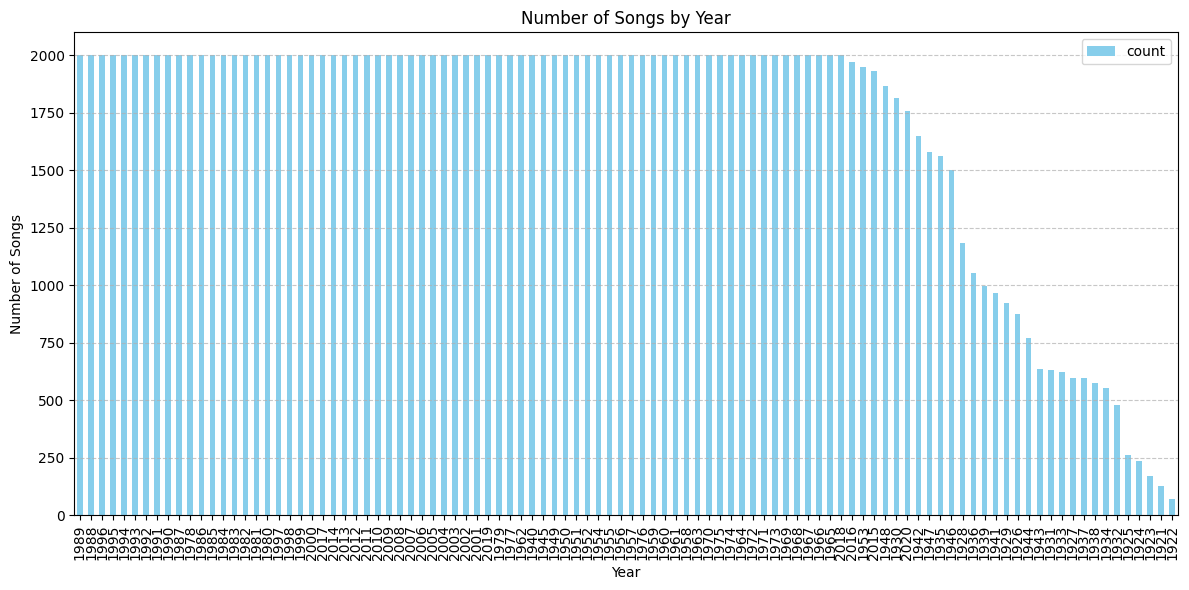

In [60]:
main_df_copy['year'].value_counts().reset_index().plot(kind='bar', x='year', y='count', figsize=(12, 6), color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.title('Number of Songs by Year')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

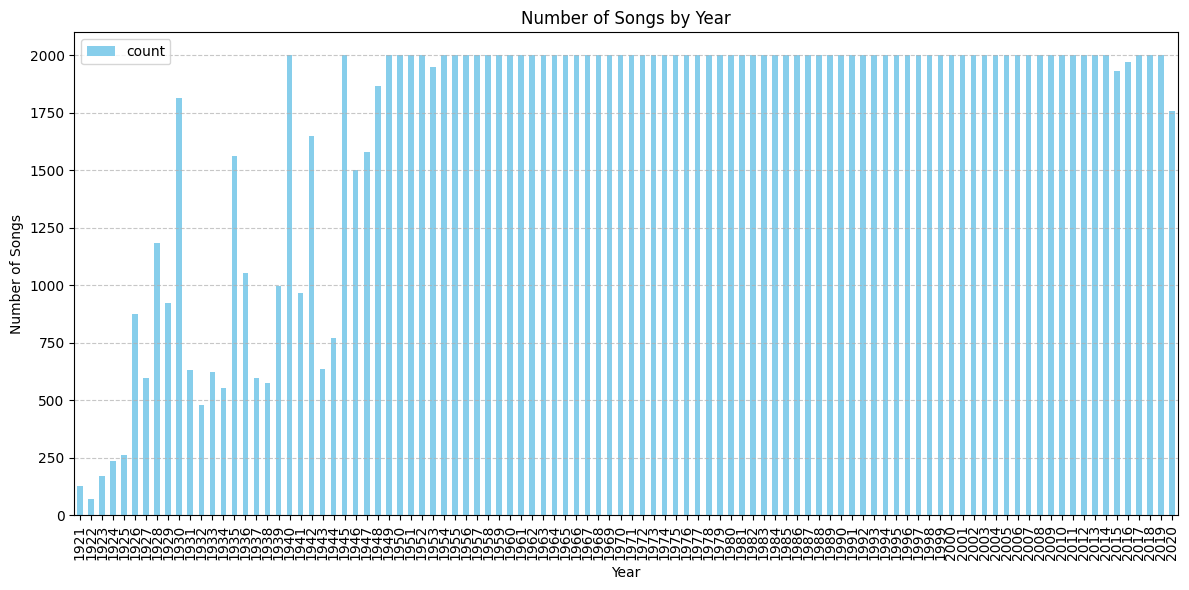

In [61]:
sorted_df = main_df_copy['year'].value_counts().reset_index().sort_values(by='year', ascending=True)

sorted_df.plot(kind='bar', x='year', y='count', figsize=(12, 6), color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.title('Number of Songs by Year')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

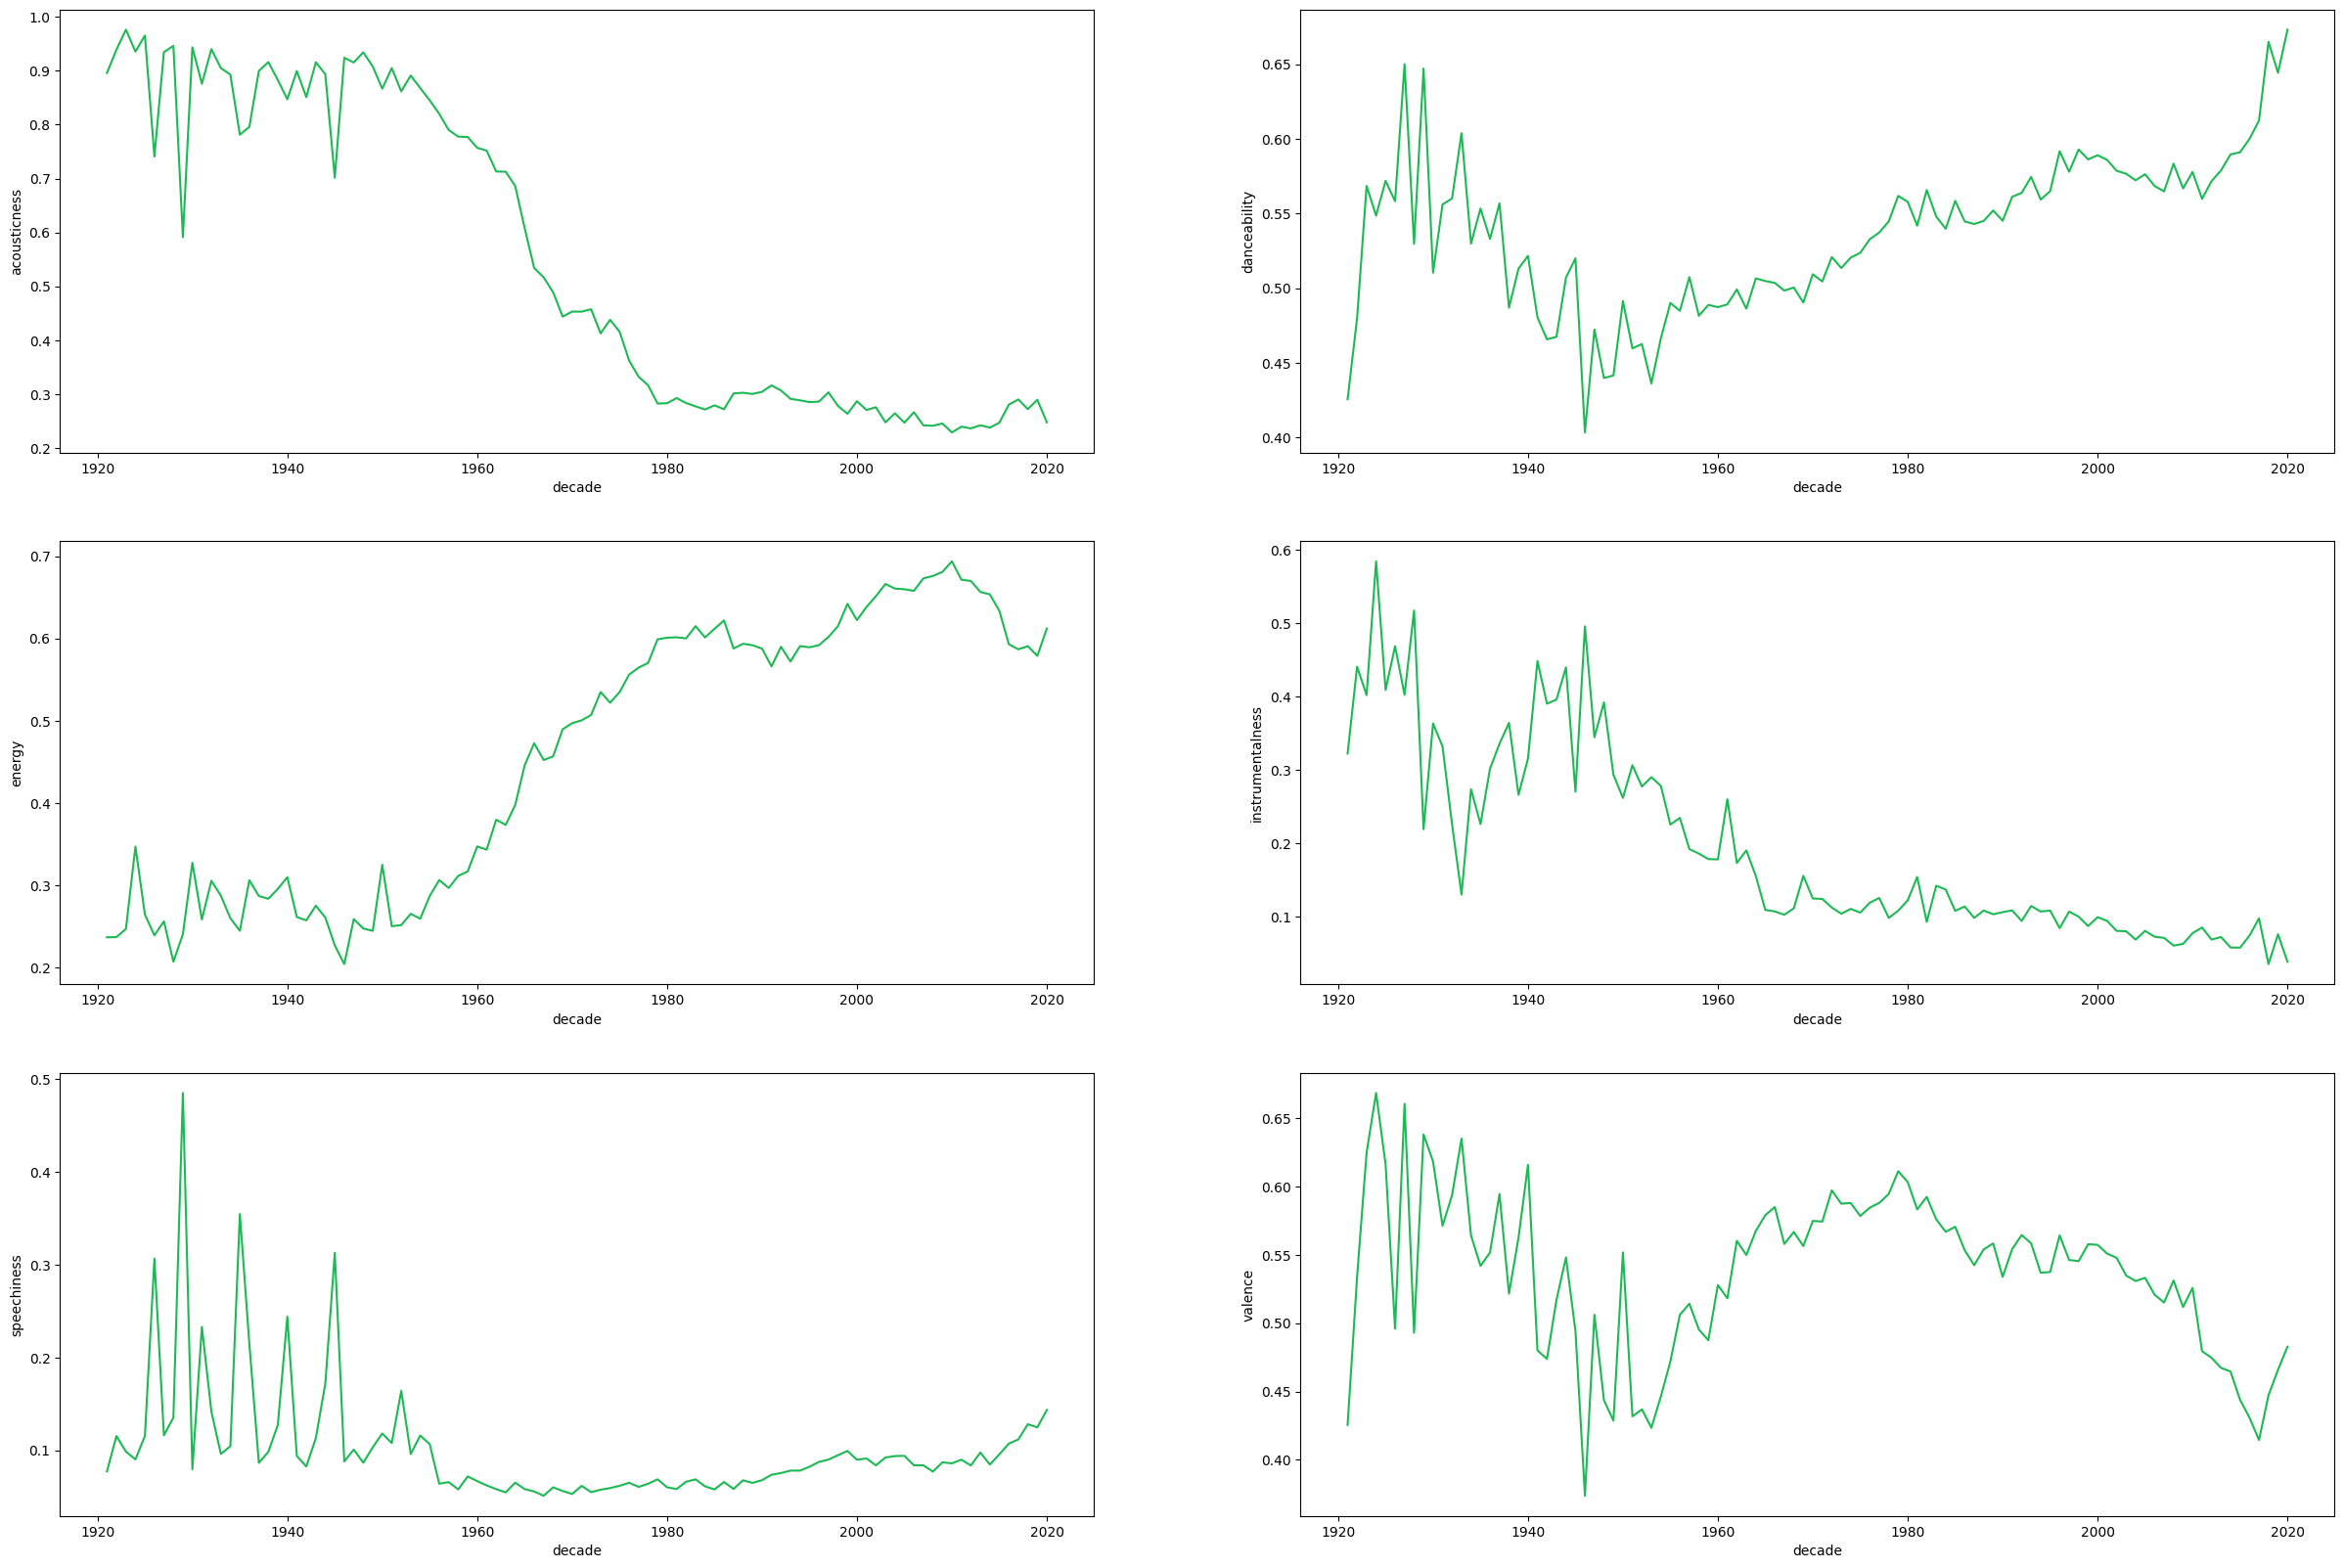

In [27]:
sp1, elements = plt.subplots(3, 2) # Initiate the subplots

arrElements = ["acousticness", "danceability", "energy", "instrumentalness", "speechiness", "valence"]
row = 0
col = 0

for elem in arrElements: # Produce a line graph for each musical element
    main_df.groupby("year")[elem].mean().plot(ax=elements[row][col], figsize=(30,20), color="#1db954") # Group rows by year and get the mean values for that particular element
    elements[row][col].set_xlabel("decade")
    elements[row][col].set_ylabel(elem)
    if col == 0:
        col = 1
    elif row == 0 and col == 1:
        row = 1
        col = 0
    elif row == 1 and col == 1:
        row = 2
        col = 0

In [67]:
from scipy.stats import f_oneway

# Perform ANOVA for each feature
for feature in features:
    # Extract unique groups based on the column you want to use for grouping (e.g., 'year')
    groups = main_df_copy['year'].unique()
    data = [main_df_copy[main_df_copy['year'] == group][feature] for group in groups]

    # Perform ANOVA
    f_statistic, p_value = f_oneway(*data)

    # Print the results
    print(f'ANOVA results for {feature}:')
    print(f'F-statistic: {f_statistic}')
    print(f'p-value: {p_value}')
    if p_value < 0.05:
        print('The differences between groups are statistically significant.')
    else:
        print('The differences between groups are not statistically significant.')
    print()


ANOVA results for acousticness:
F-statistic: 1552.6185928646498
p-value: 0.0
The differences between groups are statistically significant.

ANOVA results for danceability:
F-statistic: 153.18311774150078
p-value: 0.0
The differences between groups are statistically significant.

ANOVA results for energy:
F-statistic: 869.1147912406934
p-value: 0.0
The differences between groups are statistically significant.

ANOVA results for instrumentalness:
F-statistic: 231.57052749118975
p-value: 0.0
The differences between groups are statistically significant.

ANOVA results for liveness:
F-statistic: 15.217965539145071
p-value: 5.458194599120581e-249
The differences between groups are statistically significant.

ANOVA results for loudness:
F-statistic: 651.89494861862
p-value: 0.0
The differences between groups are statistically significant.

ANOVA results for speechiness:
F-statistic: 300.49189676314245
p-value: 0.0
The differences between groups are statistically significant.

ANOVA results fo

In [70]:
main_df['artists'].nunique()

33375

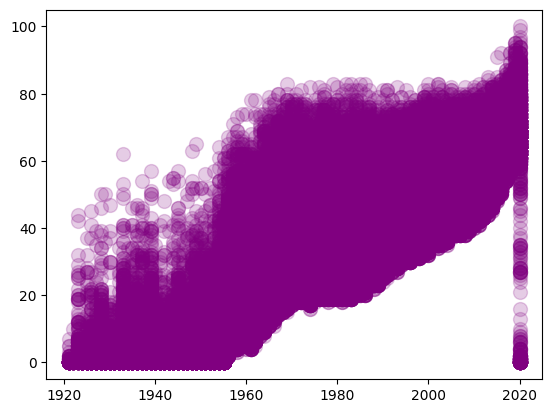

In [73]:
plt.scatter( main_df["year"], main_df["popularity"], marker='o', color = 'purple', s = 100, alpha=.2)
plt.show()

In [81]:
main_df['year'] = pd.to_datetime(main_df['year'], format='%Y')

most_popular_songs = main_df.groupby(pd.Grouper(key='year', freq='5Y')).apply(lambda x: x.loc[x['popularity'].idxmax()])

most_popular_songs.reset_index(drop=True, inplace=True)

most_popular_songs[['year', 'name', 'artists', 'popularity']]

year                                            name  \
0  1921-01-01                         Clancy Lowered the Boom   
1  1926-01-01                               Ain't Misbehavin'   
2  1928-01-01                                Sing, Sing, Sing   
3  1933-01-01  All of Me (with Eddie Heywood & His Orchestra)   
4  1939-01-01                     It's Been a Long, Long Time   
5  1945-01-01                       Again (with The Mellomen)   
6  1949-01-01                                Gymnopédie No. 1   
7  1956-01-01    I've Got You Under My Skin - Remastered 1998   
8  1961-01-01                      Can't Help Falling in Love   
9  1965-01-01                                         My Girl   
10 1969-01-01            Here Comes The Sun - Remastered 2009   
11 1974-01-01                              Sweet Home Alabama   
12 1979-01-01                                 Highway to Hell   
13 1982-01-01                                          Africa   
14 1987-01-01      I Wanna Dance with Somebody (Who Loves Me)   
15 1993-01-01                                           Creep   
16 2000-01-01                                      In the End   
17 2002-01-01                                'Till I Collapse   
18 2011-01-01                                 Pumped Up Kicks   
19 2016-01-01                                      goosebumps   
20 2020-01-01                                 Blinding Lights   

                                 artists  popularity  
0                         ['Dennis Day']           7  
1                        ['Fats Waller']          45  
2                      ['Benny Goodman']          50  
3    ['Billie Holiday', 'Eddie Heywood']          62  
4                        ['Harry James']          57  
5          ['Doris Day', 'The Mellomen']          57  
6   ['Erik Satie', 'Philippe Entremont']          65  
7                      ['Frank Sinatra']          67  
8                      ['Elvis Presley']          78  
9                    ['The Temptations']          79  
10                       ['The Beatles']          83  
11                    ['Lynyrd Skynyrd']          82  
12                             ['AC/DC']          83  
13                              ['TOTO']          83  
14                   ['Whitney Houston']          81  
15                         ['Radiohead']          82  
16                       ['Linkin Park']          83  
17               ['Eminem', 'Nate Dogg']          83  
18                 ['Foster The People']          83  
19                      ['Travis Scott']          92  
20                        ['The Weeknd']         100